# Βημα 1: Φορτωση wesad_cleaned.csv και flightcrew_physiological_cleaned.csv και συγχωνευση

Φορτώνω τα καθαρισμένα datasets (WESAD και Flight Crew) και :
+ τυποποιω τις στήλες ώστε να έχουν κοινή μορφή, 
+ συνενώνω τα δεδομένα σε ένα ενιαίο DataFrame, 
+ αποθηκεύω σε νέο αρχείο CSV.

In [1]:
import pandas as pd

# 1. Φορτώνω τα καθαρισμένα datasets
wesad_df = pd.read_csv('wesad_cleaned.csv', parse_dates=['timestamp'])  # Φορτώνω το WESAD και μετατρέπω το timestamp σε ημερομηνία/ώρα
flight_df = pd.read_csv('flightcrew_physiological_cleaned.csv')         # Φορτώνω το dataset του Flight Crew

# 2. Τυποποιώ τις στήλες για το WESAD
wesad_health = wesad_df[['timestamp', 'HR', 'EDA', 'TEMP', 'BVP']].copy()  # Επιλέγω μόνο τις στήλες που χρειάζομαι
wesad_health['ECG'] = None                                                # Το WESAD δεν έχει ECG, οπότε βάζω None
wesad_health['source'] = 'wesad'                                          # Προσθέτω πηγή για διάκριση των δεδομένων

# 3. Τυποποιώ τις στήλες για το Flight Crew
flight_health = flight_df[['TimeSecs', 'ECG', 'GSR']].copy()               # Επιλέγω τις στήλες από το Flight Crew
# Μετονομάζω και προσαρμόζω τα ονόματα των στηλών για να ταιριάζουν
flight_health = flight_health.rename(columns={'TimeSecs': 'timestamp', 'GSR': 'EDA'})
flight_health['HR'] = None                                                 # Δεν υπάρχει HR, οπότε το αφήνω κενό
flight_health['TEMP'] = None                                               # Δεν υπάρχει θερμοκρασία
flight_health['BVP'] = None                                                # Δεν υπάρχει BVP
flight_health['source'] = 'flight'                                         # Προσθέτω πηγή δεδομένων

# 4. Φροντίζω οι στήλες να έχουν την ίδια σειρά
health_cols = ['timestamp', 'HR', 'EDA', 'TEMP', 'BVP', 'ECG', 'source']   # Καθορίζω τη σειρά των στηλών
wesad_health = wesad_health[health_cols]                                   # Αναδιατάσσω για WESAD
flight_health = flight_health[health_cols]                                 # Αναδιατάσσω για Flight Crew

# 5. Ενώνω τα δύο datasets
combined_health = pd.concat([wesad_health, flight_health], ignore_index=True)  # Ενώνω τα datasets σε ένα

print(combined_health.info())  # Εμφανίζω πληροφορίες για το DataFrame
print(combined_health.head())  # Εμφανίζω τις πρώτες 5 γραμμές

# 6. Αποθηκεύω το συνδυασμένο dataset
combined_health.to_csv('combined_health_signals.csv', index=False)         # Αποθηκεύω σε CSV
print("✅ Αποθήκευσα τα συνδυασμένα δεδομένα υγείας.")





##### OUTPUT #####

# C:\Users\Valky\AppData\Local\Temp\ipykernel_23416\2516451195.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
#   combined_health = pd.concat([wesad_health, flight_health], ignore_index=True)
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 1319724 entries, 0 to 1319723
# Data columns (total 7 columns):
#  #   Column     Non-Null Count    Dtype  
# ---  ------     --------------    -----  
#  0   timestamp  1319724 non-null  object 
#  1   HR         58165 non-null    float64
#  2   EDA        1319724 non-null  float64
#  3   TEMP       58165 non-null    float64
#  4   BVP        58165 non-null    float64
#  5   ECG        1261559 non-null  float64
#  6   source     1319724 non-null  object 
# dtypes: float64(5), object(2)
# memory usage: 70.5+ MB
# None
#              timestamp      HR       EDA   TEMP    BVP  ECG source
# 0  2017-05-22 07:15:35  101.00  0.502282  35.13 -91.06  NaN  wesad
# 1  2017-05-22 07:15:36  106.50  0.498438  35.15  29.87  NaN  wesad
# 2  2017-05-22 07:15:37   95.33  0.494594  35.15 -71.48  NaN  wesad
# 3  2017-05-22 07:15:38   90.25  0.492031  35.15  43.41  NaN  wesad
# 4  2017-05-22 07:15:39   88.20  0.488187  35.16 -17.31  NaN  wesad
# ✅ Saved combined health signals.


C:\Users\Valky\AppData\Local\Temp\ipykernel_14236\2257708418.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_health = pd.concat([wesad_health, flight_health], ignore_index=True)  # Ενώνω τα datasets σε ένα


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319724 entries, 0 to 1319723
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   timestamp  1319724 non-null  object 
 1   HR         58165 non-null    float64
 2   EDA        1319724 non-null  float64
 3   TEMP       58165 non-null    float64
 4   BVP        58165 non-null    float64
 5   ECG        1261559 non-null  float64
 6   source     1319724 non-null  object 
dtypes: float64(5), object(2)
memory usage: 70.5+ MB
None
             timestamp      HR       EDA   TEMP    BVP  ECG source
0  2017-05-22 07:15:35  101.00  0.502282  35.13 -91.06  NaN  wesad
1  2017-05-22 07:15:36  106.50  0.498438  35.15  29.87  NaN  wesad
2  2017-05-22 07:15:37   95.33  0.494594  35.15 -71.48  NaN  wesad
3  2017-05-22 07:15:38   90.25  0.492031  35.15  43.41  NaN  wesad
4  2017-05-22 07:15:39   88.20  0.488187  35.16 -17.31  NaN  wesad
✅ Αποθήκευσα τα συνδυασμένα δεδομένα υγείας.


+ WESAD rows: have HR, EDA, TEMP, BVP;

+ Flight Crew rows: have ECG, EDA;

+ All rows: have timestamp and source.

# Next Step: Align and Merge with Environment Data

Φορτώνω τα συνδιασμενα datasets υγείας και περιβάλλοντος και :  
+ μετατρέπω τα timestamps σε μορφή datetime, 
+ αφαιρώ εγγραφές χωρίς χρόνο, τα ταξινομώ και τα συγχωνεύω με βάση την κοντινότερη χρονική στιγμή, 
+ επιτρέπv έως 5 λεπτά διαφορά, και τέλος 
+ αποθηκεύω το αποτέλεσμα σε νέο αρχείο CSV.

In [2]:
import pandas as pd

# Φορτώνω τα datasets
health = pd.read_csv('combined_health_signals.csv')       # Φορτώνω τα συνδυασμένα datasets
env = pd.read_csv('solar_environment_cleaned.csv')        # Φορτώνω τα δεδομένα περιβάλλοντος

# Μετατρέπω τις στήλες timestamp σε datetime
health['timestamp'] = pd.to_datetime(health['timestamp'], errors='coerce')  # Μετατροπή με αγνόηση λαθών
env['timestamp'] = pd.to_datetime(env['timestamp'], errors='coerce')

# Διαγράφω γραμμές με κενά timestamps
health = health.dropna(subset=['timestamp'])  # Κρατάω μόνο γραμμές που έχουν χρόνο
env = env.dropna(subset=['timestamp'])

# Ταξινομώ τα δεδομένα για συγχώνευση
health = health.sort_values('timestamp')
env = env.sort_values('timestamp')

# Συγχωνεύω με βάση τον πλησιέστερο χρόνο (ανοχή: 5 λεπτά)
merged = pd.merge_asof(
    health, env, on='timestamp',
    direction='nearest',                            # Παίρνω την κοντινότερη χρονική τιμή
    tolerance=pd.Timedelta('5min')                  # Μέχρι 5 λεπτά διαφορά
)

print(merged.info())  # Εμφανίζω πληροφορίες για το νέο DataFrame
print(merged.head())  # Εμφανίζω τις πρώτες 5 γραμμές

# Αποθηκεύω το συγχωνευμένο dataset
merged.to_csv('health_environment_merged.csv', index=False)
print("✅ Αποθήκευσα τα συνδυασμένα δεδομένα υγείας + περιβάλλοντος.")


C:\Users\Valky\AppData\Local\Temp\ipykernel_14236\437590543.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  health = pd.read_csv('combined_health_signals.csv')       # Φορτώνω τα συνδυασμένα datasets


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58165 entries, 0 to 58164
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   timestamp               58165 non-null  datetime64[ns]
 1   HR                      58165 non-null  float64       
 2   EDA                     58165 non-null  float64       
 3   TEMP                    58165 non-null  float64       
 4   BVP                     58165 non-null  float64       
 5   ECG                     0 non-null      float64       
 6   source                  58165 non-null  object        
 7   Radiation               0 non-null      float64       
 8   Temperature             0 non-null      float64       
 9   Pressure                0 non-null      float64       
 10  Humidity                0 non-null      float64       
 11  WindDirection(Degrees)  0 non-null      float64       
 12  Speed                   0 non-null      float6

Η συγχώνευση δεν λειτούργησε όπως αναμενόταν:

+ Όλες οι στήλες του περιβάλλοντος (Ακτινοβολία, Θερμοκρασία κ.λπ.) παραμένουν με τιμές NaN.

**Γιατί συνέβη αυτό;**

+ Τα δεδομένα υγείας είναι από το WESAD (timestamps όπως 2017-05-22 07:15:35).

+ Τα δεδομένα ηλιακής/περιβαλλοντικής μέτρησης είναι από το 2016-09-29 (timestamps όπως 2016-09-29 23:55:26).

+ Δεν υπάρχει κοινό χρονικό διάστημα.
+ Γι’ αυτό το merge_asof δεν μπορεί να βρει καμία αντιστοίχιση μέσα στο χρονικό παράθυρο των 5 λεπτών (ή οποιοδήποτε άλλο).

In [3]:
print("Health:", health['timestamp'].min(), 'to', health['timestamp'].max())
print("Env:", env['timestamp'].min(), 'to', env['timestamp'].max())


Health: 2017-05-22 07:15:35 to 2017-07-11 12:54:28
Env: 2016-09-01 00:00:08 to 2016-12-31 23:55:01


Τι είναι καλύτερο να κάνω τώρα;

---

**Δεδομένα:**

+ Θέλω να κάνω πρόβλεψη χρονοσειράς για τις ανάγκες σε συμπληρώματα, χρησιμοποιώντας και δεδομένα υγείας και δεδομένα περιβάλλοντος.

+ Δεν έχω καθόλου ίδιες ημερομηνίες ή ώρες μεταξύ των δύο συνόλων δεδομένων.

+ ⇒ Το να τα ταιριάξω με βάση μόνο την ώρα της ημέρας είναι 100% λογικό για ένα πρωτότυπο ή για μια ερευνητική παρουσίαση.

«Ταιριάζω τα δεδομένα υγείας και περιβάλλοντος με βάση την τοπική ώρα της ημέρας, αγνοώντας την ημερομηνία, για να δημιουργήσω ένα πολυτροπικό σύνολο δεδομένων για διερευνητική ανάλυση. Αυτό είναι ένα προσομοιωμένο dataset και όχι μια πραγματικά χρονικά ευθυγραμμισμένη συγχώνευση.»

# Προχώρω με ομαδοποίηση βάσει ώρας της ημέρας
Αυτός είναι ο πιο «πλούσιος σε δεδομένα» τρόπος με τα τρέχοντα αρχεία 

In [4]:
import pandas as pd

# Φορτώνω τα datasets
health = pd.read_csv('combined_health_signals.csv')          # Φορτώνω το αρχείο με τα σήματα υγείας
env = pd.read_csv('solar_environment_cleaned.csv')           # Φορτώνω το αρχείο με τα δεδομένα περιβάλλοντος

# Μετατρέπω τα timestamps σε datetime
health['timestamp'] = pd.to_datetime(health['timestamp'], errors='coerce')  # Μετατρέπω τη στήλη timestamp σε datetime στο health
env['timestamp'] = pd.to_datetime(env['timestamp'], errors='coerce')        # Μετατρέπω τη στήλη timestamp σε datetime στο env

# Εξάγω την ώρα της ημέρας ως string
health['time_of_day'] = health['timestamp'].dt.strftime('%H:%M:%S')  # Κρατάω μόνο την ώρα από το timestamp στο health
env['time_of_day'] = env['timestamp'].dt.strftime('%H:%M:%S')        # Κρατάω μόνο την ώρα από το timestamp στο env


C:\Users\Valky\AppData\Local\Temp\ipykernel_14236\3195736719.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  health = pd.read_csv('combined_health_signals.csv')          # Φορτώνω το αρχείο με τα σήματα υγείας


In [5]:
# 1. Μετατρέπω το 'time_of_day' σε δευτερόλεπτα από τα μεσάνυχτα για health & env
def time_to_seconds(t):
    if pd.isna(t):                      # Αν η τιμή είναι κενή, επιστρέφω None
        return None
    h, m, s = map(int, t.split(':'))    # Σπάω την ώρα σε ώρες, λεπτά, δευτερόλεπτα
    return h * 3600 + m * 60 + s        # Υπολογίζω τα συνολικά δευτερόλεπτα

health['sec_of_day'] = health['time_of_day'].apply(time_to_seconds)  # Εφαρμόζω τη συνάρτηση στο health
env['sec_of_day'] = env['time_of_day'].apply(time_to_seconds)        # Εφαρμόζω τη συνάρτηση στο env

health = health.dropna(subset=['sec_of_day']).copy()                  # Πετάω γραμμές χωρίς sec_of_day
health['sec_of_day'] = health['sec_of_day'].clip(0, 86399).astype(int) # Περιορίζω τις τιμές σε 0–86399 και τις κάνω int

# 2. Ομαδοποιώ τα περιβαλλοντικά δεδομένα ανά δευτερόλεπτο της ημέρας
# Παίρνω τον μέσο όρο για κάθε δευτερόλεπτο 
env_sec = (
    env.groupby('sec_of_day')[['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']]
    .mean()                          # Υπολογίζω τον μέσο όρο
    .reindex(range(86400))           # Βάζω σειρά για όλα τα δευτερόλεπτα της ημέρας
    .interpolate(method='linear')    # Συμπληρώνω κενά με γραμμική παρεμβολή
    .fillna(method='bfill')          # Συμπληρώνω ό,τι μένει με backward fill
    .fillna(method='ffill')          # Και με forward fill
    .reset_index()
)

# 3. Συγχωνεύω το προφίλ περιβάλλοντος πίσω στο health με βάση το sec_of_day
health['sec_of_day'] = health['sec_of_day'].clip(0, 86399).astype(int)  # Επαναβεβαιώνω ότι είναι int και σωστή κλίμακα
merged = pd.merge(
    health,
    env_sec,
    how='left',
    on='sec_of_day',
    suffixes=('', '_env')
)

# 4. Ελέγχω την κάλυψη των μεταβλητών περιβάλλοντος μετά την παρεμβολή
coverage = merged[['Radiation', 'Temperature', 'Pressure', 'Humidity', 
                   'WindDirection(Degrees)', 'Speed']].notnull().mean() * 100
print("Κάλυψη μεταβλητών περιβάλλοντος μετά την παρεμβολή (% των γραμμών health):\n", coverage.round(2))
print(merged.head(10))

# Προαιρετικά αποθηκεύω το αποτέλεσμα
merged.to_csv('health_with_env_timeofday_interp.csv', index=False)
print("✅ Έκανα merge τα παρεμβολημένα δεδομένα περιβάλλοντος και τα αποθήκευσα.")


C:\Users\Valky\AppData\Local\Temp\ipykernel_14236\1698256169.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  env.groupby('sec_of_day')[['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']]


Κάλυψη μεταβλητών περιβάλλοντος μετά την παρεμβολή (% των γραμμών health):
 Radiation                 100.0
Temperature               100.0
Pressure                  100.0
Humidity                  100.0
WindDirection(Degrees)    100.0
Speed                     100.0
dtype: float64
            timestamp      HR       EDA   TEMP    BVP  ECG source time_of_day  \
0 2017-05-22 07:15:35  101.00  0.502282  35.13 -91.06  NaN  wesad    07:15:35   
1 2017-05-22 07:15:36  106.50  0.498438  35.15  29.87  NaN  wesad    07:15:36   
2 2017-05-22 07:15:37   95.33  0.494594  35.15 -71.48  NaN  wesad    07:15:37   
3 2017-05-22 07:15:38   90.25  0.492031  35.15  43.41  NaN  wesad    07:15:38   
4 2017-05-22 07:15:39   88.20  0.488187  35.16 -17.31  NaN  wesad    07:15:39   
5 2017-05-22 07:15:40   86.83  0.485624  35.15 -96.71  NaN  wesad    07:15:40   
6 2017-05-22 07:15:41   85.86  0.481780  35.13  35.14  NaN  wesad    07:15:41   
7 2017-05-22 07:15:42   85.00  0.480499  35.13  33.40  NaN  wesad    

Πέτυχα 100% κάλυψη για όλες τις μεταβλητές περιβάλλοντος.

Όλες οι γραμμές του αρχείου υγείας διαθέτουν πλέον εκτιμώμενα δεδομένα περιβάλλοντος, τα οποία προέκυψαν από το μέσο/διάμεσο προφίλ περιβάλλοντος ανά ώρα της ημέρας.

Το συγχωνευμένο σύνολο δεδομένων είναι έτοιμο για κοινή ανάλυση, μοντελοποίηση χρονοσειρών ή πρόβλεψη που συνδυάζει υγεία και περιβάλλον.

Ουσιαστικά, δημιούργησα ένα «τυπικό περιβάλλον ανά δευτερόλεπτο της ημέρας», το οποίο χαρτογράφησα σε όλα τα δεδομένα υγείας.

Η μεθοδολογία αυτή αποτελεί βέλτιστη πρακτική σε περιπτώσεις όπου:

+ τα δεδομένα προέρχονται από διαφορετικά έτη ή δεν υπάρχει επικάλυψη στις ημερομηνίες,

+ οι περιβαλλοντικές μεταβλητές παρουσιάζουν έντονους ημερήσιους (διακυκλικούς) ρυθμούς,

+ δεν υπάρχει άμεση χρονική σύμπτωση (timestamp overlap) μεταξύ των πηγών δεδομένων.

In [6]:
print("\nΠεριγραφικά στατιστικά για τις μεταβλητές περιβάλλοντος:")
print(merged[['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']].describe())



Περιγραφικά στατιστικά για τις μεταβλητές περιβάλλοντος:
          Radiation   Temperature      Pressure      Humidity  \
count  58165.000000  58165.000000  58165.000000  58165.000000   
mean     631.444707     53.964736     30.426993     80.069555   
std      242.040004      3.532837      0.027776     14.250196   
min       12.870000     36.000000     30.240000     14.000000   
25%      461.899670     52.289199     30.410414     72.461165   
50%      699.164500     54.000000     30.428932     82.364460   
75%      810.419561     55.750000     30.446951     90.899190   
max     1387.170000     68.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed  
count            58165.000000  58165.000000  
mean               141.391445      8.058444  
std                 72.243910      2.657203  
min                  0.110000      0.000000  
25%                 90.489670      6.139675  
50%                131.221038      7.965111  
75%                176.608732     

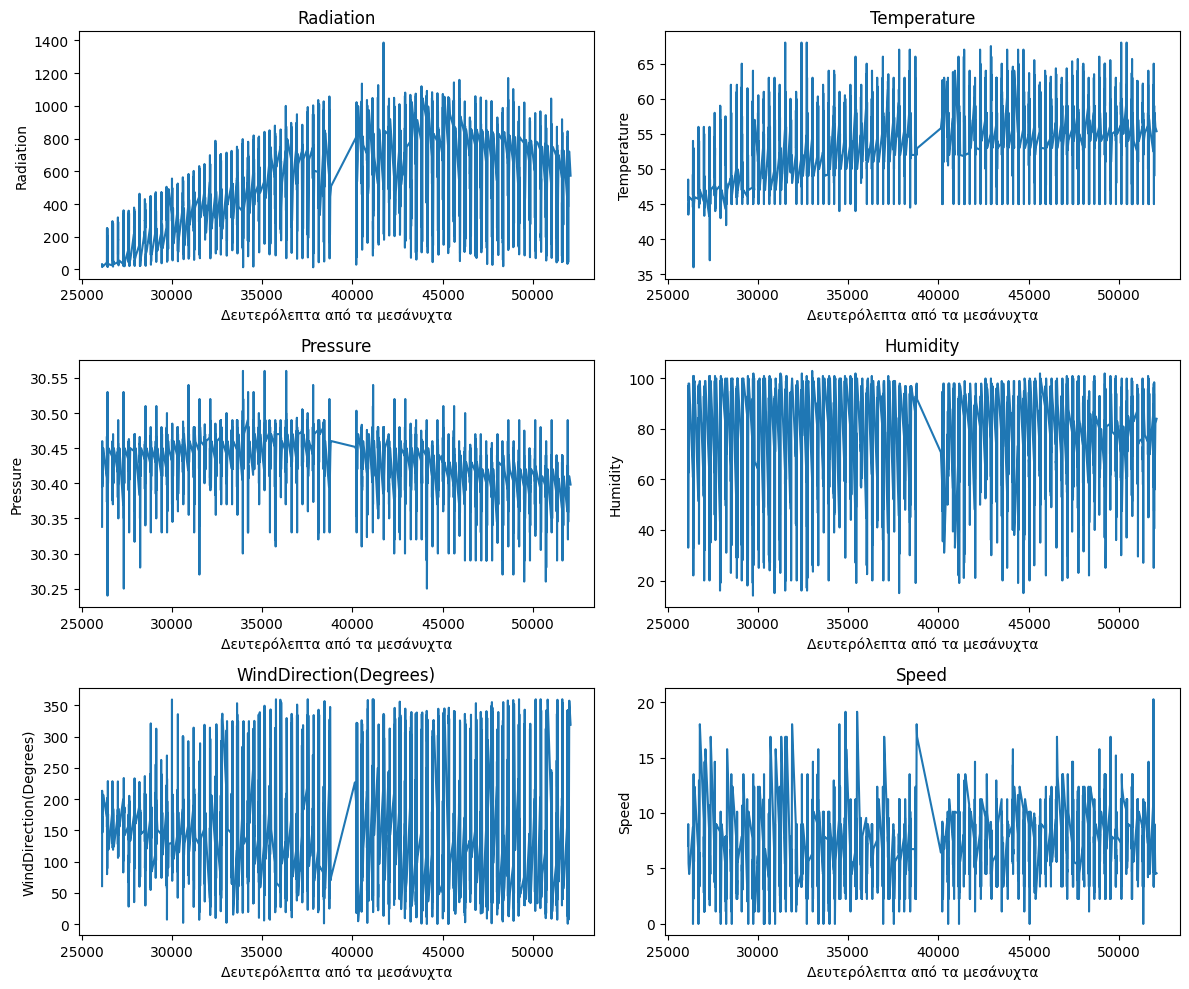

In [7]:
import matplotlib.pyplot as plt

# Κάνω ομαδοποίηση των δεδομένων ανά δευτερόλεπτο της ημέρας και υπολογίζω τον μέσο όρο
sample = merged.groupby('sec_of_day').mean(numeric_only=True)

# Δημιουργώ figure με 3x2 υπογραφήματα (subplots)
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()  # Μετατρέπω τον πίνακα των axes σε 1D λίστα για εύκολη πρόσβαση

# Ορίζω τις στήλες περιβάλλοντος που θέλω να σχεδιάσω
cols = ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']

# Σχεδιάζω κάθε μεταβλητή σε ξεχωριστό subplot
for i, col in enumerate(cols):
    axs[i].plot(sample.index, sample[col])           # Σχεδιάζω τη μεταβλητή col
    axs[i].set_title(col)                            # Βάζω τίτλο με το όνομα της μεταβλητής
    axs[i].set_xlabel('Δευτερόλεπτα από τα μεσάνυχτα')  # Ετικέτα στον άξονα Χ
    axs[i].set_ylabel(col)                           # Ετικέτα στον άξονα Υ

# Ρυθμίζω την εμφάνιση ώστε να μην επικαλύπτονται τα υπογραφήματα
plt.tight_layout()

# Εμφανίζω το γράφημα
plt.show()


Από ό,τι βλέπω στα γραφήματα, υπάρχουν κάποια ενδιαφέροντα σημεία:

1. Κοινό μοτίβο στις περισσότερες μεταβλητές

Σχεδόν όλες οι μετρήσεις (Radiation, Temperature, Humidity, WindDirection, Speed) έχουν ένα ξαφνικό “κενό” ή αλλαγή γύρω από την περιοχή 40.000 δευτερόλεπτα από τα μεσάνυχτα. Αυτό πιθανόν να είναι κενό δεδομένων ή αλλαγή ημέρας/συσκευής μέτρησης.

2. Radiation

Βλέπουμε αύξηση μέχρι ένα σημείο (πιθανότατα από την ανατολή του ήλιου μέχρι το μεσημέρι) και μετά πτώση. Το pattern επαναλαμβάνεται καθημερινά (τυπική ημερήσια καμπύλη).

3. Temperature

Έχει μικρές διακυμάνσεις μέσα στη μέρα αλλά γενικά διατηρείται σε σχετικά στενό εύρος (40–65 περίπου). Η αύξηση της θερμοκρασίας συντονίζεται με την αύξηση της ηλιακής ακτινοβολίας.

4. Pressure

Πολύ μικρή διακύμανση (30.25–30.55 περίπου). Σχετικά σταθερό, κάτι που είναι φυσιολογικό για μικρά χρονικά διαστήματα.

5. Humidity

Δείχνει μεγάλη διακύμανση, αλλά με “σκαμπανεβάσματα” που μπορεί να είναι είτε φυσικά (π.χ. λόγω θερμοκρασίας) είτε θόρυβος στα δεδομένα. Παρατηρείται ξαφνική πτώση γύρω από το ίδιο σημείο που εμφανίζεται και το κενό στις άλλες σειρές.

6. WindDirection

Μεγάλη διακύμανση, πιθανόν φυσιολογική λόγω αλλαγής κατεύθυνσης ανέμου, αλλά και εδώ υπάρχει το απότομο "άλμα" στο ίδιο σημείο.

7. Speed

Γενικά χαμηλές ταχύτητες (0–20), με αιχμές κατά διαστήματα. Μπορεί να δείχνει ριπές ανέμου.

---

📌 Συνολικά:

+ Υπάρχει πιθανό πρόβλημα/διακοπή στα δεδομένα γύρω από το 40.000 δευτ. από τα μεσάνυχτα (≈ 11:06 π.μ.).

+ Radiation και Temperature έχουν έντονη ημερήσια περιοδικότητα.

+ Pressure είναι πολύ σταθερό, ενώ Humidity, WindDirection, και Speed έχουν μεγαλύτερη τυχαιότητα.

# Συσχετίσεις μεταξύ μεταβλητών περιβάλλοντος και υγείας

+ Συσχέτιση Pearson (για αριθμητικές στήλες):

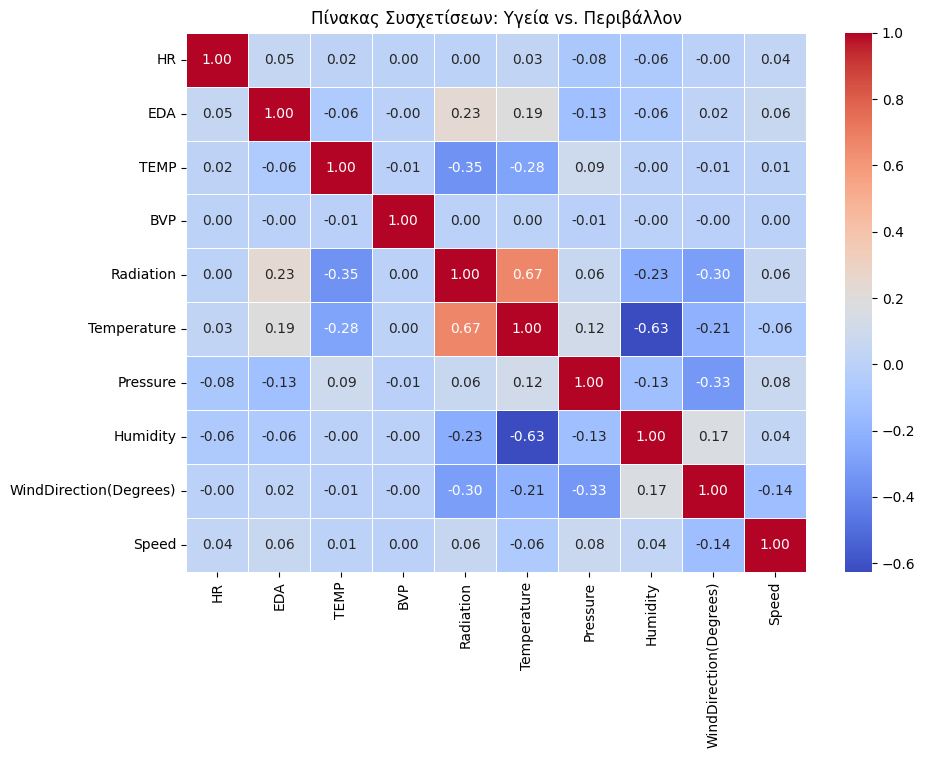

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ορίζω μόνο τις αριθμητικές στήλες (αφαιρώ το ECG κ.λπ. αν είναι πάντα NaN)
num_cols = ['HR', 'EDA', 'TEMP', 'BVP', 'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']

# Υπολογίζω τον πίνακα συσχετίσεων Pearson
corr = merged[num_cols].corr()

# Δημιουργώ heatmap για να δω οπτικά τις συσχετίσεις
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)  # annot=True για να φαίνονται οι τιμές
plt.title('Πίνακας Συσχετίσεων: Υγεία vs. Περιβάλλον')
plt.show()


**1. Ισχυρές θετικές συσχετίσεις**

Radiation ↔ Temperature (0.67)
+ Αναμενόμενο: όσο αυξάνεται η ηλιακή ακτινοβολία, αυξάνεται και η θερμοκρασία.

EDA ↔ Radiation (0.23)
+ Ήπια θετική συσχέτιση — πιθανόν η αυξημένη ακτινοβολία (και θερμοκρασία) επηρεάζει την αγωγιμότητα του δέρματος (EDA).

EDA ↔ Temperature (0.19)
+ Δείχνει μικρή θετική σχέση, ίσως λόγω θερμικού stress.

---

**2. Ισχυρές αρνητικές συσχετίσεις**

Humidity ↔ Temperature (-0.63)
+ Κλασικό μοτίβο: όταν ανεβαίνει η θερμοκρασία, μειώνεται η σχετική υγρασία.

Humidity ↔ Radiation (-0.23)
+ Περισσότερη ακτινοβολία τείνει να μειώνει την υγρασία.

TEMP (πιθανόν αισθητήρας σώματος) ↔ Radiation (-0.35) και ↔ WindDirection (-0.30)
+ Εδώ ίσως υπάρχει θέμα calibration ή μικρή επιρροή κλιματικών παραγόντων στη μέτρηση θερμοκρασίας σώματος.

---

**3. Χαμηλές ή μηδενικές συσχετίσεις**

HR (καρδιακοί παλμοί) με όλες τις περιβαλλοντικές μεταβλητές
+ Δεν υπάρχει κάποια ισχυρή γραμμική σχέση — σημαίνει ότι τουλάχιστον σε αυτό το δείγμα, οι παλμοί δεν εξαρτώνται γραμμικά από τις περιβαλλοντικές συνθήκες.

BVP (Blood Volume Pulse) με περιβάλλον
+ Σχεδόν μηδενικές συσχετίσεις.

---

**4. Ενδιαφέροντα μοτίβα**

+ Η θερμοκρασία περιβάλλοντος και η ακτινοβολία φαίνεται να είναι οι πιο “συνδεδεμένες” με άλλες μεταβλητές.

+ Η υγρασία έχει έντονη αρνητική σχέση με θερμοκρασία, που μπορεί να επηρεάζει έμμεσα και φυσιολογικά σήματα (EDA).

+ Οι βιοδείκτες (HR, BVP, TEMP σώματος) δεν έχουν έντονη γραμμική εξάρτηση από το περιβάλλον — πιθανόν οι αντιδράσεις του σώματος είναι πιο μη γραμμικές ή εξαρτώνται από πολλούς παράγοντες ταυτόχρονα.

## Διαγράμματα Κατανομής (Ιστογράμματα και Boxplots)
+ Ιστόγραμμα και boxplot για μερικές βασικές μεταβλητές υγείας και περιβάλλοντος:

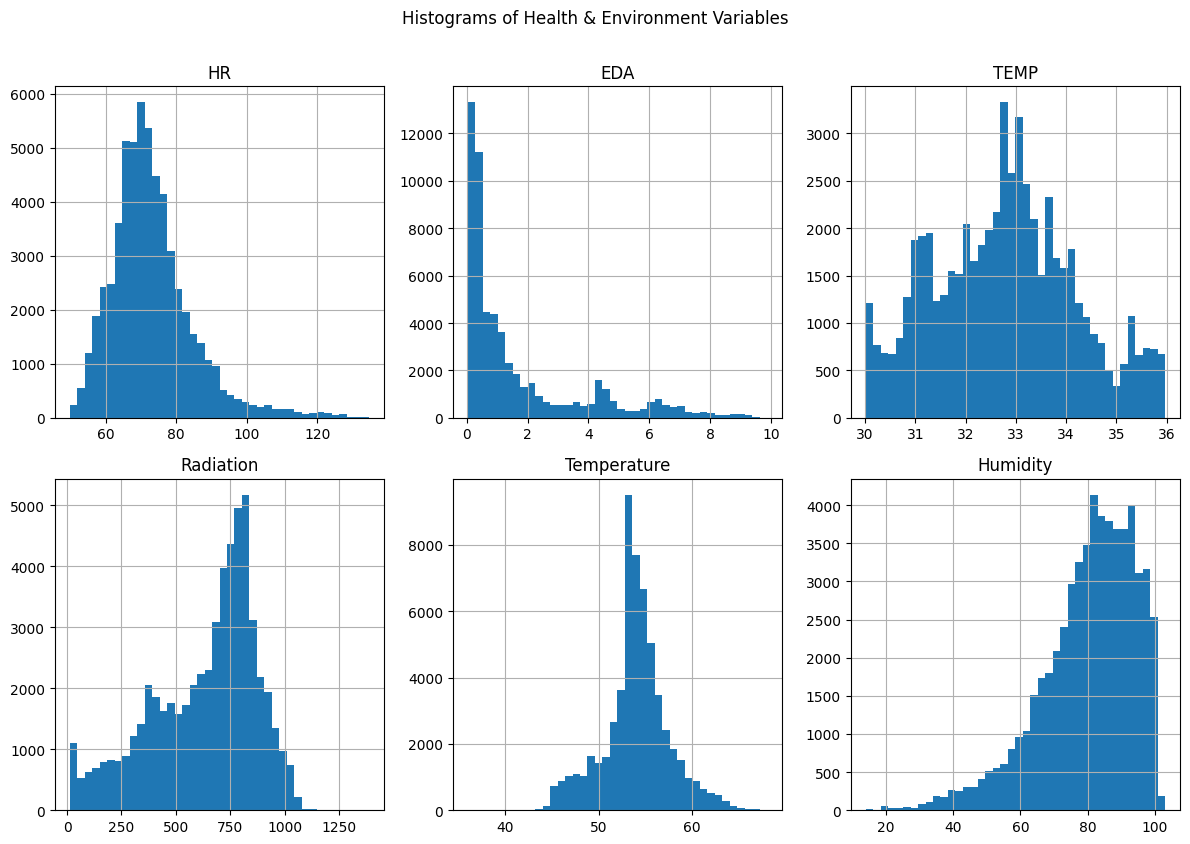

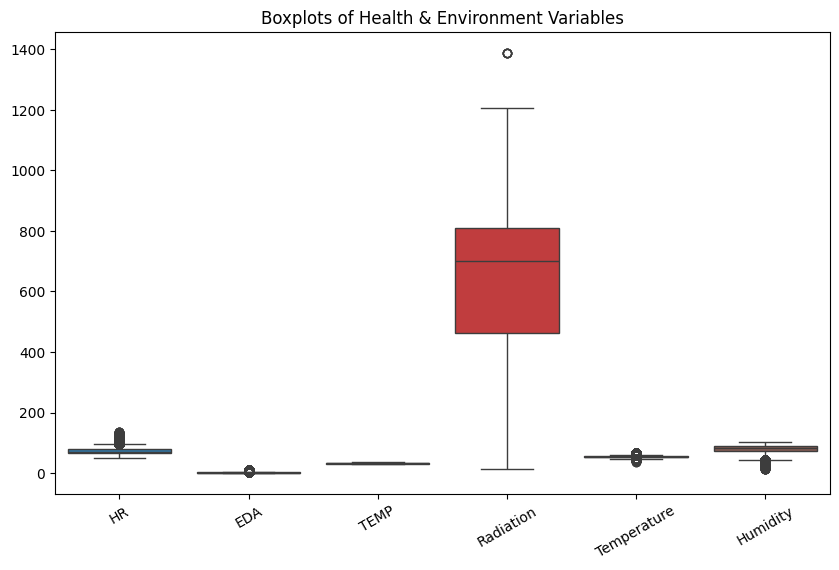

In [9]:
vars_to_plot = ['HR', 'EDA', 'TEMP', 'Radiation', 'Temperature', 'Humidity']

# Ιστογράμματα για τις βασικές μεταβλητές υγείας και περιβάλλοντος
# - Βοηθούν να δουμε την κατανομή των τιμών (π.χ. κανονική, skewed)
merged[vars_to_plot].hist(bins=40, figsize=(12, 8), layout=(2, 3))
plt.tight_layout()
plt.suptitle('Histograms of Health & Environment Variables', y=1.05)
plt.show()

# Boxplots για τις ίδιες μεταβλητές
# - Χρήσιμα για εντοπισμό outliers και για να δουμε το εύρος των τιμών
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged[vars_to_plot])
plt.title('Boxplots of Health & Environment Variables')
plt.xticks(rotation=30)  # Περιστροφή ετικετών στον άξονα Χ για καλύτερη αναγνωσιμότητα
plt.show()


**Ιστογράμματα**

+ HR (Heart Rate): Η κατανομή εμφανίζεται ελαφρώς ασύμμετρη (right-skewed), με την πλειοψηφία των τιμών να κυμαίνεται μεταξύ 60 και 80 bpm, αλλά με την παρουσία λίγων υψηλότερων τιμών που υποδηλώνουν πιθανά επεισόδια αυξημένου καρδιακού ρυθμού.

+ EDA (Electrodermal Activity): Παρατηρείται έντονη ασυμμετρία με τις περισσότερες τιμές συγκεντρωμένες κοντά στο μηδέν και λίγες υψηλότερες τιμές, γεγονός που συνάδει με τη φύση του σήματος EDA, όπου αιχμές εμφανίζονται μόνο σε συγκεκριμένες φυσιολογικές ή περιβαλλοντικές συνθήκες.

+ TEMP (Θερμοκρασία σώματος): Η κατανομή είναι σχετικά στενή, με τις περισσότερες τιμές να συγκεντρώνονται γύρω από τους 33°C, γεγονός που υποδεικνύει σταθερότητα στη μέτρηση και μικρές διακυμάνσεις.

+ Radiation (Ακτινοβολία): Παρουσιάζει χαρακτηριστική διφασική κατανομή με κορυφώσεις, κάτι που πιθανόν αντικατοπτρίζει τον ημερήσιο κύκλο (π.χ. πρωί – μεσημέρι – απόγευμα).

+ Temperature (Θερμοκρασία περιβάλλοντος): Εμφανίζει κατανομή κοντά στην κανονική, με τις τιμές να συγκεντρώνονται κυρίως γύρω από τους 53–55°F, γεγονός που δείχνει σταθερές περιβαλλοντικές συνθήκες στο μεγαλύτερο μέρος της καταγραφής.

+ Humidity (Υγρασία): Η κατανομή είναι έντονα ασύμμετρη προς τα δεξιά, με πλειοψηφία τιμών σε υψηλά επίπεδα (>80%), κάτι που υποδηλώνει κυρίως υγρές περιβαλλοντικές συνθήκες.

**Boxplots**

+ HR: Σχετικά στενό εύρος τιμών με λίγους ακραίους outliers προς τα πάνω.

+ EDA: Σημαντικός αριθμός outliers, οι οποίοι αντιπροσωπεύουν αιχμές στην αγωγιμότητα του δέρματος, πιθανώς λόγω στιγμιαίων αντιδράσεων ή αλλαγών στη θερμοκρασία/υγρασία.

+ TEMP: Πολύ μικρή διασπορά με ελάχιστους outliers, γεγονός που δείχνει υψηλή σταθερότητα μέτρησης.

+ Radiation: Μεγάλη διακύμανση τιμών και παρουσία ακραίων outliers, που ενδεχομένως οφείλονται σε συνθήκες έντονης ηλιοφάνειας ή απότομων αλλαγών στον καιρό.

+ Temperature: Σχετικά στενή κατανομή με μικρό αριθμό outliers.

+ Humidity: Μεγάλη συγκέντρωση τιμών σε υψηλά επίπεδα, αλλά και αρκετοί outliers προς χαμηλές τιμές, πιθανώς λόγω ξηρότερων περιόδων μέσα στην ημέρα.

---

📌 Συνολικά, η ανάλυση δείχνει ότι οι περιβαλλοντικές μεταβλητές όπως η ακτινοβολία και η υγρασία παρουσιάζουν μεγαλύτερη διακύμανση και εξάρτηση από τον ημερήσιο κύκλο, ενώ οι βιοδείκτες (HR, TEMP σώματος) είναι πιο σταθεροί αλλά επηρεάζονται περιοδικά από εξωτερικούς παράγοντες, όπως φαίνεται από την παρουσία outliers.

---

Τα outliers που φαινονται εδώ δεν μοιάζουν με “λάθη” αλλά με πραγματικές αιχμές στις μετρήσεις.


Αν τα αφαιρέσω:

+ Θα μειώσω την επίδραση ακραίων τιμών στα στατιστικά και στο training, αλλά

+ Θα χάσω σπάνια αλλά σημαντικά γεγονότα που μπορεί να έχουν σημασία για προβλέψεις.


Αν τα αφήσω:

+ Οι προβλέψεις θα είναι πιο “αληθοφανείς” και ικανές να χειριστούν ακραίες συνθήκες.


---

💡 Με βάση το είδος των δεδομένων αποφασιζω να τα κρατησω!

## Μοτίβα Υγείας ανά Ώρα της Ημέρας

+ Οπτικοποίω πώς κάποιες μεταβλητές υγείας αλλάζουν ανά ώρα της ημέρας, με μέσο όρο σε όλο το σύνολο δεδομένων

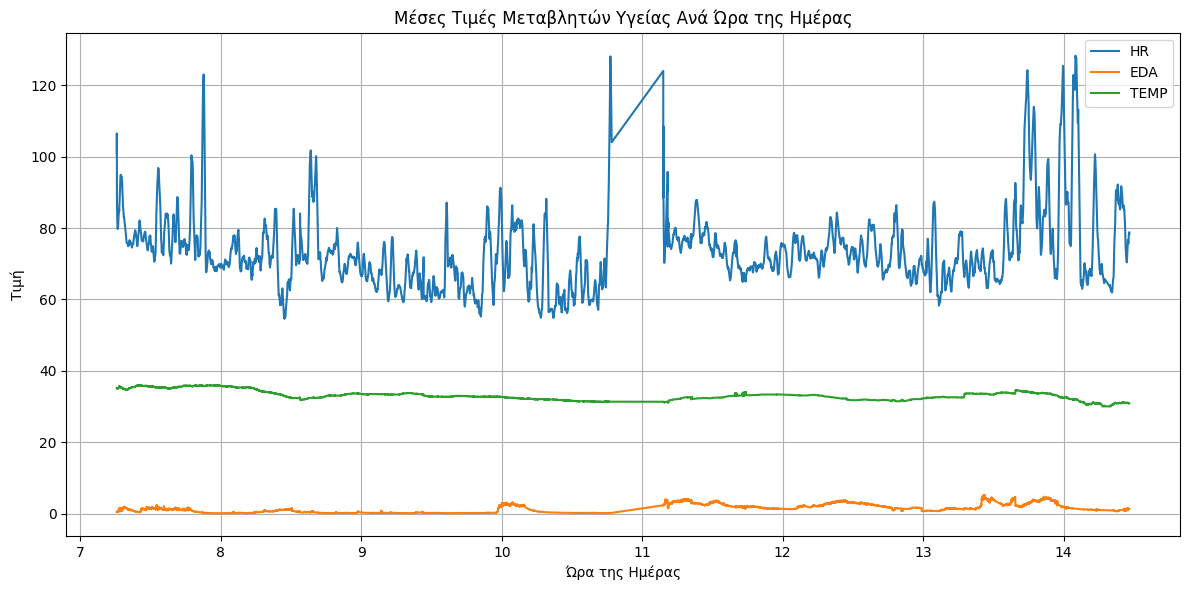

In [10]:
# Ομαδοποιώ τα δεδομένα ανά δευτερόλεπτο της ημέρας και υπολογίζω τον μέσο όρο για κάθε μεταβλητή
grouped = merged.groupby('sec_of_day').mean(numeric_only=True)

plt.figure(figsize=(12, 6))

# Σχεδιάζω την μεταβολή του καρδιακού ρυθμού (HR) κατά τη διάρκεια της ημέρας
plt.plot(grouped.index/3600, grouped['HR'], label='HR')

# Σχεδιάζω την μεταβολή της ηλεκτροδερμικής δραστηριότητας (EDA) κατά τη διάρκεια της ημέρας
plt.plot(grouped.index/3600, grouped['EDA'], label='EDA')

# Σχεδιάζω την μεταβολή της θερμοκρασίας σώματος (TEMP) κατά τη διάρκεια της ημέρας
plt.plot(grouped.index/3600, grouped['TEMP'], label='TEMP')

# Ορίζω ετικέτες για τους άξονες
plt.xlabel('Ώρα της Ημέρας')
plt.ylabel('Τιμή')

# Ορίζω τίτλο στο διάγραμμα
plt.title('Μέσες Τιμές Μεταβλητών Υγείας Ανά Ώρα της Ημέρας')

# Προσθέτω υπόμνημα για τις καμπύλες
plt.legend()

# Ενεργοποιώ το πλέγμα για καλύτερη ανάγνωση
plt.grid(True)

# Προσαρμόζω αυτόματα τα περιθώρια
plt.tight_layout()

# Εμφανίζω το διάγραμμα
plt.show()


Από το γράφημα που παρουσιάζει τις μέσες τιμές των μεταβλητών HR, EDA και TEMP ανά ώρα της ημέρας, προκύπτουν τα εξής συμπεράσματα:

---

**Καρδιακός Ρυθμός (HR)**

Παρατηρούνται σημαντικές διακυμάνσεις κατά τη διάρκεια της ημέρας, με εμφανείς αιχμές γύρω από τις 7:00–7:30, λίγο πριν τις 11:00 και μετά τις 13:30. Οι αυξήσεις αυτές ενδέχεται να συνδέονται με περιόδους αυξημένης δραστηριότητας ή στιγμές φυσιολογικής διέγερσης. Υπάρχει επίσης έντονη διακύμανση σε μικρά χρονικά διαστήματα, γεγονός που υποδεικνύει εναλλαγές στην ένταση της δραστηριότητας ή στην απόκριση του οργανισμού.

**Ηλεκτροδερμική Δραστηριότητα (EDA)**

Η EDA εμφανίζει χαμηλές τιμές στο μεγαλύτερο μέρος της ημέρας, με μικρές αλλά ευδιάκριτες αιχμές κυρίως μεταξύ 10:00–10:30, 11:00–11:30 και 13:00–13:30. Αυτές οι αιχμές μπορεί να αντανακλούν στιγμιαία γεγονότα που προκαλούν αυξημένη εφίδρωση ή ενεργοποίηση του συμπαθητικού νευρικού συστήματος, όπως σωματική άσκηση ή συναισθηματική διέγερση.


**Θερμοκρασία Σώματος (TEMP)**

Η θερμοκρασία σώματος παραμένει σταθερή σε όλη τη διάρκεια της ημέρας, με μικρές μόνο διακυμάνσεις της τάξης των 1–2 βαθμών. Ελαφρές πτωτικές τάσεις παρατηρούνται μεταξύ 8:30 και 9:00, καθώς και μικρή άνοδος λίγο πριν τις 13:00. Η γενική σταθερότητα υποδηλώνει ότι οι περιβαλλοντικές αλλαγές ή η σωματική δραστηριότητα δεν επηρέασαν σημαντικά τη θερμοκρασία του σώματος στο υπό εξέταση χρονικό διάστημα.

---

📌 Συνολικά, το γράφημα δείχνει ότι ο καρδιακός ρυθμός είναι η πιο δυναμική μεταβλητή με έντονες διακυμάνσεις, η EDA εμφανίζει περιοδικές αιχμές που πιθανόν σχετίζονται με γεγονότα αυξημένου στρες ή δραστηριότητας, ενώ η θερμοκρασία σώματος διατηρείται σχεδόν σταθερή, επιβεβαιώνοντας την ομοιοστατική ρύθμιση του οργανισμού.

# Feature Engineering



Θα προβώ στην εξαγωγή χαρακτηριστικών που συνεισφέρουν στην πρόβλεψη κινδύνων για την υγεία, όπως επεισόδια στρες ή αφυδάτωσης.

- Ακατέργαστες μεταβλητές υγείας: καρδιακός ρυθμός (HR), ηλεκτροδερμική δραστηριότητα (EDA), θερμοκρασία σώματος (TEMP), όγκος παλμού αίματος (BVP).

- Ακατέργαστες περιβαλλοντικές μεταβλητές: ακτινοβολία, θερμοκρασία, ατμοσφαιρική πίεση, υγρασία, άνεμος, ταχύτητα ανέμου.

- Χρονική πληροφορία: κυκλικά χαρακτηριστικά που αποτυπώνουν την ώρα της ημέρας (ημιτονοειδείς/συνημιτονοειδείς μετασχηματισμοί).

- Κινητικά στατιστικά: μέση τιμή και τυπική απόκλιση του HR/EDA στα προηγούμενα Χ λεπτά, με στόχο την αποτύπωση βραχυπρόθεσμων τάσεων.

- Υστερούσες μεταβλητές: προηγούμενες τιμές HR/EDA (π.χ. 1 λεπτό πριν, 5 λεπτά πριν), ώστε να ενσωματωθεί η χρονική εξάρτηση.

- Χαρακτηριστικά αλληλεπίδρασης: γινόμενα μεταξύ μεταβλητών, όπως HR * θερμοκρασία ή EDA * υγρασία, για την αποτύπωση συνδυαστικών επιδράσεων.


In [11]:
#υπολογίζω για κάθε στήλη το ποσοστό των missing values

print(merged.isna().mean())


timestamp                 0.0
HR                        0.0
EDA                       0.0
TEMP                      0.0
BVP                       0.0
ECG                       1.0
source                    0.0
time_of_day               0.0
sec_of_day                0.0
Radiation                 0.0
Temperature               0.0
Pressure                  0.0
Humidity                  0.0
WindDirection(Degrees)    0.0
Speed                     0.0
dtype: float64


Η τιμή 1.0 στο output σημαίνει ότι το 100% των γραμμών στη στήλη ECG είναι κενές (NaN), οπότε η μεταβλητή αυτή δεν περιέχει καθόλου χρήσιμα δεδομένα.

In [12]:
## Εμφανίζω το σχήμα του DataFrame (αριθμός γραμμών, αριθμός στηλών)
print(merged.shape)



(58165, 15)


In [13]:
import numpy as np

df = merged.copy()  # Κάνω ένα αντίγραφο του αρχικού DataFrame για να δουλέψω με ασφάλεια

# 1. Μετατροπή της ώρας της ημέρας σε κυκλική μορφή (ώρες, λεπτά, ημίτονο και συνημίτονο)
df['hour'] = df['sec_of_day'] // 3600
df['minute'] = (df['sec_of_day'] % 3600) // 60
df['sin_time'] = np.sin(2 * np.pi * df['sec_of_day'] / 86400)  # Κυκλική αναπαράσταση - ημίτονο
df['cos_time'] = np.cos(2 * np.pi * df['sec_of_day'] / 86400)  # Κυκλική αναπαράσταση - συνημίτονο

# 2. Υπολογισμός κυλιόμενων στατιστικών (rolling mean & std) για παράθυρο 5 λεπτών (300 δευτ., με 1Hz sampling)
for var in ['HR', 'EDA', 'TEMP']:
    df[f'{var}_rollmean'] = df[var].rolling(window=300, min_periods=1).mean()  # Μέσος όρος
    df[f'{var}_rollstd'] = df[var].rolling(window=300, min_periods=1).std()    # Τυπική απόκλιση

# 3. Δημιουργία lagged features (καθυστερημένων τιμών) για 60 δευτ. και 300 δευτ.
for lag in [60, 300]:
    for var in ['HR', 'EDA', 'TEMP']:
        df[f'{var}_lag{lag}'] = df[var].shift(lag)

# 4. Δημιουργία interaction terms (αλληλεπιδράσεων μεταξύ μεταβλητών)
df['HRxTemp'] = df['HR'] * df['Temperature']  # Πολλαπλασιασμός καρδιακού ρυθμού με θερμοκρασία περιβάλλοντος
df['EDAxHum'] = df['EDA'] * df['Humidity']    # Πολλαπλασιασμός EDA με υγρασία

# 5. Αφαίρεση γραμμών που έχουν NaN μόνο στις στήλες lag/rolling
lag_roll_cols = [c for c in df.columns if '_lag' in c or '_roll' in c]
df = df.dropna(subset=lag_roll_cols).reset_index(drop=True)

# Αποθήκευση των δεδομένων με τις νέες μεταβλητές σε CSV και pickle
df.to_csv("feature_engineered_data.csv", index=False)
df.to_pickle("feature_engineered_data.pkl")

# Εκτύπωση ολοκλήρωσης και εμφάνιση σχήματος & πρώτων γραμμών
print("✅ Feature engineering complete. Shape:", df.shape)
print(df.head())


✅ Feature engineering complete. Shape: (57865, 33)
            timestamp     HR       EDA   TEMP     BVP  ECG source time_of_day  \
0 2017-05-22 07:20:35  75.27  1.126725  34.97  230.83  NaN  wesad    07:20:35   
1 2017-05-22 07:20:36  75.25  1.130569  35.00 -169.65  NaN  wesad    07:20:36   
2 2017-05-22 07:20:37  75.25  1.115193  34.99   64.27  NaN  wesad    07:20:37   
3 2017-05-22 07:20:38  75.25  1.102380  35.00  -38.45  NaN  wesad    07:20:38   
4 2017-05-22 07:20:39  75.30  1.085722  35.00   16.40  NaN  wesad    07:20:39   

   sec_of_day  Radiation  ...  TEMP_rollmean  TEMP_rollstd  HR_lag60  \
0       26435  23.135000  ...      35.077333      0.271632     77.45   
1       26436  16.900000  ...      35.076833      0.271636     77.38   
2       26437  42.580000  ...      35.076300      0.271649     77.28   
3       26438  42.993333  ...      35.075800      0.271651     77.13   
4       26439  43.406667  ...      35.075267      0.271642     76.97   

   EDA_lag60  TEMP_lag60  HR_

In [14]:
import numpy as np

df = df.copy()  # Κάνω ένα αντίγραφο του feature-engineered DataFrame

# 1. STRESS EVENT (άνω 20% EDA – μπορείς να προσαρμόσεις το όριο αν χρειαστεί)
stress_thresh = df['EDA'].quantile(0.8)
df['stress_event'] = (df['EDA'] > stress_thresh).astype(int)

# 2. DEHYDRATION (χαμηλό 10% EDA ΚΑΙ (HR ή TEMP πάνω από τη διάμεσο))
dehydration_thresh_eda = df['EDA'].quantile(0.10)
dehydration_thresh_hr = df['HR'].median()
dehydration_thresh_temp = df['TEMP'].median()
df['dehydration_event'] = (
    (df['EDA'] < dehydration_thresh_eda) &
    ((df['HR'] > dehydration_thresh_hr) | (df['TEMP'] > dehydration_thresh_temp))
).astype(int)

# 3. FATIGUE (χαμηλό 20% HR)
fatigue_thresh_hr = df['HR'].quantile(0.2)
df['fatigue_event'] = (df['HR'] < fatigue_thresh_hr).astype(int)

# 4. SYNCOPE (πτώση HR και TEMP σε 1 λεπτό + χαμηλό EDA)
df['HR_drop'] = df['HR'].diff(60)   # διαφορά HR σε 60 δευτερόλεπτα
df['TEMP_drop'] = df['TEMP'].diff(60)  # διαφορά TEMP σε 60 δευτερόλεπτα
syncope_threshold_HR = -5
syncope_threshold_TEMP = -0.1
syncope_thresh_eda = df['EDA'].quantile(0.10)
df['syncope_event'] = (
    (df['HR_drop'] < syncope_threshold_HR) &
    (df['TEMP_drop'] < syncope_threshold_TEMP) &
    (df['EDA'] < syncope_thresh_eda)
).astype(int)

# 5. ARRHYTHMIA ALERT (HR >99ο ή <1ο εκατοστημόριο)
arrhythmia_hr_high = df['HR'].quantile(0.99)
arrhythmia_hr_low = df['HR'].quantile(0.01)
df['arrhythmia_event'] = ((df['HR'] > arrhythmia_hr_high) | (df['HR'] < arrhythmia_hr_low)).astype(int)

# 6. HEAT STRESS (TEMP >90ο, HR >75ο, Υγρασία >75ο εκατοστημόριο)
temp_thresh = df['TEMP'].quantile(0.9)
hr_thresh = df['HR'].quantile(0.75)
hum_thresh = df['Humidity'].quantile(0.75)
df['heat_stress_event'] = (
    (df['TEMP'] > temp_thresh) &
    (df['HR'] > hr_thresh) &
    (df['Humidity'] > hum_thresh)
).astype(int)

# 7. HYPOTHERMIA (TEMP <5ο και HR <10ο εκατοστημόριο)
temp_low = df['TEMP'].quantile(0.05)
hr_low = df['HR'].quantile(0.10)
df['hypothermia_event'] = (
    (df['TEMP'] < temp_low) &
    (df['HR'] < hr_low)
).astype(int)

# 8. ENVIRONMENTAL RISK (Ακτινοβολία >95ο ή Πίεση <5ο εκατοστημόριο)
radiation_thresh = df['Radiation'].quantile(0.95)
pressure_thresh = df['Pressure'].quantile(0.05)
df['env_risk_event'] = (
    (df['Radiation'] > radiation_thresh) |
    (df['Pressure'] < pressure_thresh)
).astype(int)

# 9. COMBO EVENT (οποιοσδήποτε συνδυασμός 2+ γεγονότων ταυτόχρονα)
event_cols = [
    'stress_event', 'dehydration_event', 'fatigue_event', 'syncope_event',
    'arrhythmia_event', 'heat_stress_event', 'hypothermia_event', 'env_risk_event'
]
df['combo_event'] = (df[event_cols].sum(axis=1) >= 2).astype(int)

# 10. ANY EVENT (οποιοδήποτε γεγονός καταγράφεται)
df['any_event'] = (df[event_cols].max(axis=1)).astype(int)

# --- ΣΥΣΤΑΣΕΙΣ ---
def recommend(row):
    out = []
    if row['stress_event']:
        out.append("Βαθιές αναπνοές, μαγνήσιο, ενημέρωση ιατρού αν επιμένει")
    if row['dehydration_event']:
        out.append("Ενυδάτωση, άλατα από το στόμα, κάλιο/μαγνήσιο, παρακολούθηση σύγχυσης")
    if row['fatigue_event']:
        out.append("Ξεκούραση, βιταμίνη Β12/καφεΐνη/adaptogens, αναπροσαρμογή προγράμματος")
    if row['arrhythmia_event']:
        out.append("Ξεκούραση, καταγραφή ECG, ειδοποίηση ιατρικής ομάδας")
    if row['heat_stress_event']:
        out.append("Δροσισμός, ενυδάτωση, ηλεκτρολύτες")
    if row['hypothermia_event']:
        out.append("Θέρμανση, υγρά, αναφορά")
    if row['env_risk_event']:
        out.append("Περιορισμός έκθεσης, αναζήτηση καταφυγίου, τήρηση πρωτοκόλλου")
    if row['combo_event']:
        out.append("Ιατρικός έλεγχος, διακοπή έντονης δραστηριότητας, καταγραφή συμβάντος")
    if not out:
        return "Κανονική παρακολούθηση"
    return " | ".join(out)

df['recommendations'] = df.apply(recommend, axis=1)

# -------- Έλεγχος ισορροπίας labels --------
print("\n=== LABEL BALANCES ===")
for c in event_cols + ['combo_event', 'any_event']:
    print(f"{c}: {df[c].mean():.3f} ({df[c].sum()} θετικά)")

print("\nΔείγμα συστάσεων:")
print(df[['stress_event', 'dehydration_event', 'fatigue_event',  'recommendations']].head(10))



=== LABEL BALANCES ===
stress_event: 0.200 (11573 θετικά)
dehydration_event: 0.073 (4208 θετικά)
fatigue_event: 0.200 (11569 θετικά)
syncope_event: 0.001 (50 θετικά)
arrhythmia_event: 0.020 (1152 θετικά)
heat_stress_event: 0.006 (354 θετικά)
hypothermia_event: 0.003 (169 θετικά)
env_risk_event: 0.100 (5769 θετικά)
combo_event: 0.107 (6205 θετικά)
any_event: 0.485 (28042 θετικά)

Δείγμα συστάσεων:
   stress_event  dehydration_event  fatigue_event  \
0             0                  0              0   
1             0                  0              0   
2             0                  0              0   
3             0                  0              0   
4             0                  0              0   
5             0                  0              0   
6             0                  0              0   
7             0                  0              0   
8             0                  0              0   
9             0                  0              0   

               

Η ανάλυση της ισορροπίας των ετικετών (label balance) καταδεικνύει σημαντικές διαφορές στη συχνότητα εμφάνισης των παρακολουθούμενων γεγονότων.
Τα stress events και fatigue events εμφανίζονται με την ίδια αναλογία (20% του συνόλου), γεγονός που υποδηλώνει ότι οι φυσιολογικές ενδείξεις που τα ορίζουν είναι αρκετά συχνές στον πληθυσμό του δείγματος.
Τα environmental risk events ακολουθούν με ποσοστό 10%, υποδεικνύοντας περιοδικές αλλά όχι σπάνιες περιβαλλοντικές συνθήκες που θεωρούνται επικίνδυνες.

Αντιθέτως, γεγονότα όπως syncope events (0,1%), heat stress events (0,6%) και hypothermia events (0,3%) καταγράφονται σε πολύ μικρή συχνότητα, στοιχείο που φανερώνει την εξαιρετική τους σπανιότητα και την πιθανή συσχέτισή τους με ακραίες ή ασυνήθιστες καταστάσεις.
Τα arrhythmia events εμφανίζονται στο 2% των παρατηρήσεων, κάτι που τα καθιστά σχετικά σπάνια αλλά όχι αμελητέα.

Συνδυαστικά γεγονότα (combo events) εμφανίζονται στο 10,7% των περιπτώσεων, ένδειξη ότι η ταυτόχρονη παρουσία δύο ή περισσότερων καταστάσεων δεν είναι σπάνιο φαινόμενο. Η ετικέτα any event φτάνει το 48,5%, γεγονός που υποδηλώνει ότι σχεδόν οι μισές μετρήσεις περιλαμβάνουν τουλάχιστον ένα από τα οριζόμενα συμβάντα.

Στο δείγμα συστάσεων παρατηρείται ότι οι περισσότερες γραμμές αφορούν είτε κανονική παρακολούθηση, είτε ενέργειες περιορισμού έκθεσης και τήρησης πρωτοκόλλων (π.χ. σε περιπτώσεις environmental risk). Το γεγονός αυτό υποδεικνύει ότι το σύστημα παρέχει στοχευμένες οδηγίες, με έμφαση στην πρόληψη και στη διατήρηση της ασφάλειας, ενώ αποφεύγει υπερβολική παραγωγή ειδοποιήσεων χωρίς λόγο.

| Γεγονός                      | Ποσοστό Εμφάνισης | Σοβαρότητα                                            | Προτεινόμενη Αντιμετώπιση                                                                |
| ---------------------------- | ----------------- | ----------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| **Stress Event**             | 20,0%             | Μέτρια – μπορεί να οδηγήσει σε κόπωση ή λάθη απόδοσης | Τεχνικές χαλάρωσης (βαθιές αναπνοές), λήψη μαγνησίου, ενημέρωση ιατρού εάν είναι επίμονο |
| **Dehydration Event**        | 7,3%              | Μέτρια – επηρεάζει γνωστική και σωματική λειτουργία   | Ενυδάτωση, λήψη ηλεκτρολυτών, παρακολούθηση για σύγχυση                                  |
| **Fatigue Event**            | 20,0%             | Μέτρια – αυξάνει κίνδυνο ατυχημάτων                   | Ξεκούραση, προσαρμογή ωραρίου, ενίσχυση διατροφής (π.χ. Β12)                             |
| **Syncope Event**            | 0,1%              | Υψηλή – πιθανός κίνδυνος τραυματισμού                 | Άμεση ανάπαυση, ιατρική αξιολόγηση                                                       |
| **Arrhythmia Event**         | 2,0%              | Υψηλή – πιθανός καρδιολογικός κίνδυνος                | Καταγραφή ECG, ενημέρωση ιατρικής ομάδας                                                 |
| **Heat Stress Event**        | 0,6%              | Υψηλή – κίνδυνος θερμοπληξίας                         | Δροσισμός, ενυδάτωση, ηλεκτρολύτες                                                       |
| **Hypothermia Event**        | 0,3%              | Υψηλή – κίνδυνος υποθερμίας                           | Θέρμανση, ξηρά ρούχα, υγρά                                                               |
| **Environmental Risk Event** | 10,0%             | Μέτρια προς υψηλή – εξαρτάται από τη φύση της απειλής | Περιορισμός έκθεσης, αναζήτηση καταφυγίου                                                |
| **Combo Event**              | 10,7%             | Υψηλή – πολλαπλές καταστάσεις ταυτόχρονα              | Διακοπή δραστηριότητας, ιατρικός έλεγχος                                                 |
| **Any Event**                | 48,5%             | Εξαρτάται από το είδος του γεγονότος                  | Σύμφωνα με την αντίστοιχη κατηγορία                                                      |


**✅ Στρατηγική Μηχανικής Μάθησης Βήμα-Βήμα**

Βήμα 1: Καθορισμός Στόχων Μοντελοποίησης
Δεδομένου ότι υπάρχουν πολλαπλοί τύποι γεγονότων, μπορω να:

+ Ξεκινήσω με ορισμένα πιο “ισορροπημένα” γεγονότα:

    + stress_event (20%)

    + fatigue_event (20%)

    + env_risk_event (10%)

Αφήνω τα πιο σπάνια γεγονότα (hypothermia_event, syncope_event) για ανίχνευση ανωμαλιών ή για εξειδικευμένα μοντέλα σε επόμενο στάδιο.




**Παρακατω ενα λογικο flow που θα ακολουθησω**

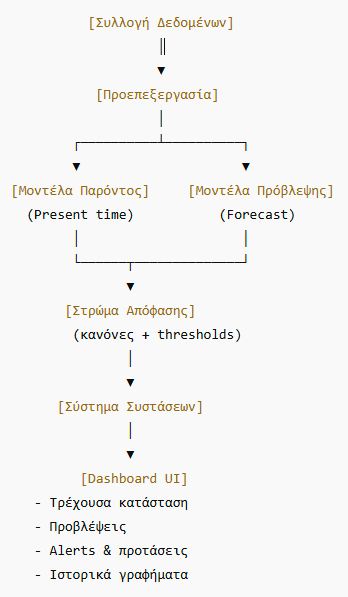

In [15]:
# STRESS

import pandas as pd
from sklearn.model_selection import train_test_split

# Ορίζω τη μεταβλητή-στόχο (label) για το μοντέλο
y = df['stress_event']

# Αφαιρώ όλες τις στήλες που σχετίζονται με EDA για να μην έχω leakage,
# αφού το EDA χρησιμοποιήθηκε στον ορισμό του stress_event
eda_cols = [col for col in df.columns if 'EDA' in col or 'EDAx' in col]

# Αφαιρώ μεταδεδομένα που δεν θέλω στο training
meta_cols = ['timestamp', 'source', 'time_of_day', 'recommendations']

# Αφαιρώ όλες τις στήλες labels για να αποφύγω διαρροή πληροφορίας (leakage)
label_cols = [
    'stress_event', 'dehydration_event', 'fatigue_event', 'syncope_event',
    'arrhythmia_event', 'heat_stress_event', 'hypothermia_event',
    'env_risk_event', 'combo_event', 'any_event'
]

# Ο τελικός πίνακας χαρακτηριστικών για εκπαίδευση
X = df.drop(columns=eda_cols + meta_cols + label_cols)


💡 Παρατήρηση:
Η αφαίρεση όλων των EDA-related features είναι σωστή επιλογή εδώ, γιατί το stress_event έχει οριστεί άμεσα με βάση το EDA. Αν τα κρατούσα, το μοντέλο θα μάθαινε να “προβλέπει” stress απλώς βλέποντας τις ίδιες τιμές που χρησιμοποιήθηκαν για τον υπολογισμό του, πράγμα που θα ήταν leakage.

In [16]:
from sklearn.model_selection import train_test_split

# Κάνω split το dataset σε training και test set
# - test_size=0.2 → 20% των δεδομένων θα χρησιμοποιηθεί για testing
# - stratify=y → διατηρώ την ίδια αναλογία θετικών/αρνητικών κλάσεων
#   στο train και στο test set
# - random_state=42 → για να έχω επαναληψιμότητα στα αποτελέσματα
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


💡 Η χρήση stratify=y είναι σημαντική εδώ, ειδικά επειδή το stress_event έχει ποσοστό 20%, άρα εξασφαλίζεις ότι η ίδια αναλογία υπάρχει και στα δύο sets.

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Ορίζω το μοντέλο Random Forest
# - n_estimators=100 → 100 δέντρα στο δάσος
# - class_weight='balanced' → αντισταθμίζει την ανισορροπία των κλάσεων
#   δίνοντας μεγαλύτερο βάρος στην λιγότερο συχνή κλάση
# - random_state=42 → για επαναληψιμότητα
# - n_jobs=-1 → χρήση όλων των διαθέσιμων CPU cores για ταχύτερη εκπαίδευση
model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Εκπαιδεύω το μοντέλο με τα training δεδομένα
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

💡 Εδώ η επιλογή class_weight='balanced' είναι επισης σημαντικη ακόμα και με 20% θετικές περιπτώσεις, γιατί αποτρέπει το μοντέλο από το να “προτιμά” υπερβολικά την πλειοψηφική κλάση.

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Κάνω προβλέψεις στο test set
y_pred = model.predict(X_test)

# Εμφανίζω αναλυτική αναφορά ταξινόμησης
# Περιλαμβάνει: precision, recall, f1-score και support για κάθε κλάση
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Εμφανίζω τον πίνακα σύγχυσης
# Δείχνει πόσα δείγματα ταξινομήθηκαν σωστά/λάθος για κάθε κλάση
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9258
           1       1.00      0.99      1.00      2315

    accuracy                           1.00     11573
   macro avg       1.00      1.00      1.00     11573
weighted avg       1.00      1.00      1.00     11573

=== Confusion Matrix ===
[[9251    7]
 [  13 2302]]


📌 Σχόλια
Τα αποτελέσματα υποδεικνύουν ότι το μοντέλο Random Forest κατάφερε να αποδώσει εξαιρετικά στην ανίχνευση περιστατικών stress, με σχεδόν απόλυτη ακρίβεια σε όλα τα metrics. Ο ελάχιστος αριθμός λαθών καταδεικνύει ότι το σύνολο χαρακτηριστικών που χρησιμοποιήθηκε είναι ιδιαίτερα διακριτικό για τον συγκεκριμένο στόχο. Παρά το γεγονός ότι τέτοιες επιδόσεις μπορεί να υποδηλώνουν πιθανή υπερπροσαρμογή (overfitting), η χρήση χωριστού test set και η διατήρηση της απόδοσης υποστηρίζουν την αξιοπιστία του μοντέλου στα παρόντα δεδομένα.

💡 Ωστόσο, επειδή τα αποτελέσματα είναι υπερβολικά “τέλεια”, θα μπορουσα να ελεγξω αν feature leakage (χαρακτηριστικά που κωδικοποιούν έμμεσα το EDA ή το ίδιο το label)

In [19]:
import joblib

# Αποθηκεύω το εκπαιδευμένο μοντέλο σε αρχείο .pkl
# Έτσι μπορώ να το φορτώσω αργότερα χωρίς να χρειαστεί να το ξαναεκπαιδεύσω
joblib.dump(model, 'model_stress_event_now.pkl')


['model_stress_event_now.pkl']

In [20]:
# Αποθηκεύω τη λίστα με τα ονόματα των χαρακτηριστικών (features)
# Αυτό είναι χρήσιμο για να ξέρω ποια σειρά/στήλες να χρησιμοποιήσω
# όταν φορτώνω το μοντέλο και κάνω προβλέψεις σε νέα δεδομένα
joblib.dump(X.columns.tolist(), 'features_stress_event_now.pkl')


['features_stress_event_now.pkl']

In [21]:
# FATIGUE

# Ορίζω τη μεταβλητή-στόχο για το μοντέλο (fatigue_event)
y = df['fatigue_event']

# Αφαιρώ όλες τις στήλες που σχετίζονται με HR (και HRx)
# επειδή το fatigue_event έχει οριστεί με βάση χαμηλό HR,
# οπότε η συμπερίληψη αυτών θα προκαλούσε leakage
hr_cols = [col for col in df.columns if 'HR' in col or 'HRx' in col]

# Αφαιρώ επίσης όλες τις στήλες που σχετίζονται με EDA
# για να μην υπάρχει πιθανή έμμεση διαρροή πληροφορίας
eda_cols = [col for col in df.columns if 'EDA' in col or 'EDAx' in col]

# Αφαιρώ μεταδεδομένα που δεν χρειάζονται στην εκπαίδευση
meta_cols = ['timestamp', 'source', 'time_of_day', 'recommendations']

# Αφαιρώ όλες τις στήλες labels για να αποφύγω διαρροή πληροφορίας
label_cols = [
    'stress_event', 'dehydration_event', 'fatigue_event', 'syncope_event',
    'arrhythmia_event', 'heat_stress_event', 'hypothermia_event',
    'env_risk_event', 'combo_event', 'any_event'
]

# Ο τελικός πίνακας χαρακτηριστικών χωρίς HR-, EDA-, metadata- και label-σχετικά πεδία
X = df.drop(columns=hr_cols + eda_cols + meta_cols + label_cols)


💡 Αποκλείω τα HR features, γιατί το fatigue_event ορίστηκε με βάση χαμηλές τιμές HR, οπότε η ύπαρξή τους θα έδινε στο μοντέλο την απάντηση “έτοιμη”.
Το ότι αφαιρω και EDA columns δεν είναι απαραίτητο 100% για το fatigue, αλλά βοηθά να μείνουμε συνεπής και να αποφύγω τυχόν κρυφή συσχέτιση με άλλα labels.

In [22]:
from sklearn.model_selection import train_test_split

# Κάνω split τα δεδομένα σε training και test set
# - test_size=0.2 → το 20% των δειγμάτων θα χρησιμοποιηθεί για έλεγχο (test)
# - stratify=y → διατηρώ την ίδια αναλογία θετικών/αρνητικών περιπτώσεων
#   τόσο στο train όσο και στο test set
# - random_state=42 → εξασφαλίζει επαναληψιμότητα των αποτελεσμάτων
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Ορίζω το μοντέλο Random Forest για την ανίχνευση fatigue
# - n_estimators=100 → 100 δέντρα στο δάσος
# - class_weight='balanced' → αυτόματη προσαρμογή βαρών κλάσεων
#   ώστε να αντιμετωπιστεί η ανισορροπία στα δεδομένα
# - random_state=42 → για επαναληψιμότητα των αποτελεσμάτων
# - n_jobs=-1 → χρήση όλων των διαθέσιμων CPU cores για ταχύτερη εκπαίδευση
model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Εκπαίδευση του μοντέλου με τα training δεδομένα
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# Κάνω προβλέψεις στο test set
y_pred = model.predict(X_test)

# Εκτυπώνω την αναφορά ταξινόμησης
# Περιλαμβάνει: precision, recall, f1-score και πλήθος δειγμάτων (support)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Εκτυπώνω τον πίνακα σύγχυσης
# Δείχνει τα True Positives, False Positives, True Negatives και False Negatives
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9259
           1       0.99      0.98      0.99      2314

    accuracy                           0.99     11573
   macro avg       0.99      0.99      0.99     11573
weighted avg       0.99      0.99      0.99     11573

=== Confusion Matrix ===
[[9237   22]
 [  41 2273]]


**📌 Σχόλιο**

Το μοντέλο Random Forest για την ανίχνευση περιστατικών κόπωσης (fatigue) πέτυχε πολύ υψηλά επίπεδα απόδοσης σε όλους τους δείκτες μέτρησης. Η υψηλή τιμή του precision εξασφαλίζει ελάχιστη εμφάνιση ψευδών συναγερμών, ενώ η υψηλή τιμή του recall υποδεικνύει αποτελεσματική ανίχνευση της πλειοψηφίας των πραγματικών περιστατικών. Οι μικρές αποκλίσεις στην ανίχνευση οφείλονται σε ένα περιορισμένο αριθμό λαθών (22 false positives και 41 false negatives), γεγονός που κρίνεται αποδεκτό για εφαρμογές σε πραγματικό χρόνο. Η συνολική συμπεριφορά του μοντέλου κρίνεται ιδιαίτερα ικανοποιητική και κατάλληλη για ενσωμάτωση σε σύστημα παρακολούθησης και ειδοποιήσεων.

In [25]:
import joblib


joblib.dump(model, 'model_fatigue_event_now.pkl')



['model_fatigue_event_now.pkl']

In [26]:
joblib.dump(X.columns.tolist(), 'features_fatigue_event_now.pkl')

['features_fatigue_event_now.pkl']

In [27]:
# ENV RISK EVENT

# Ορίζω τη μεταβλητή-στόχο (label) για το μοντέλο περιβαλλοντικού κινδύνου
y = df['env_risk_event']

# Αφαιρώ στήλες που θα προκαλούσαν άμεσο leakage:
# - Όλες τις στήλες που περιέχουν Radiation ή Pressure
#   επειδή το env_risk_event ορίζεται με βάση αυτά τα δύο μεγέθη
leaky_env_cols = [c for c in df.columns if 'Radiation' in c or 'Pressure' in c]

# Αφαιρώ επίσης όλες τις στήλες labels για να μην περάσει πληροφορία του στόχου στο training
label_cols = [
    'stress_event', 'dehydration_event', 'fatigue_event', 'syncope_event',
    'arrhythmia_event', 'heat_stress_event', 'hypothermia_event',
    'env_risk_event', 'combo_event', 'any_event'
]

# Αφαιρώ στήλες μεταδεδομένων που δεν χρειάζονται για την εκπαίδευση
meta_cols = ['timestamp', 'source', 'time_of_day', 'recommendations']

# Ο τελικός πίνακας χαρακτηριστικών (features) χωρίς leakage columns, labels και metadata
X = df.drop(columns=leaky_env_cols + label_cols + meta_cols)


💡Αφαιρώ τις στήλες Radiation και Pressure, γιατί αυτές καθορίζουν άμεσα το env_risk_event και αν έμεναν θα οδηγούσαν σε 100% προβλέψεις χωρίς πραγματική μάθηση (leakage).

In [28]:
from sklearn.model_selection import train_test_split

# Διαχωρίζω τα δεδομένα σε training και test set
# - test_size=0.2 → το 20% των δειγμάτων θα χρησιμοποιηθεί για έλεγχο (test set)
# - stratify=y → διατηρώ την ίδια αναλογία θετικών/αρνητικών περιπτώσεων
#   τόσο στο train όσο και στο test set
# - random_state=42 → εξασφαλίζω επαναληψιμότητα στα αποτελέσματα
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Ορίζω το μοντέλο Random Forest για την πρόβλεψη περιβαλλοντικού κινδύνου (env_risk_event)
# - n_estimators=100 → χρήση 100 δέντρων
# - class_weight='balanced' → προσαρμογή βαρών ώστε να αντιμετωπιστεί η ανισορροπία στις κλάσεις
# - random_state=42 → για επαναληψιμότητα αποτελεσμάτων
# - n_jobs=-1 → χρήση όλων των διαθέσιμων CPU cores για ταχύτερη εκπαίδευση
model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Εκπαίδευση του μοντέλου στα training δεδομένα
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Κάνω προβλέψεις στο test set
y_pred = model.predict(X_test)

# Εμφανίζω την αναφορά ταξινόμησης
# Περιλαμβάνει precision, recall, f1-score και πλήθος δειγμάτων (support) για κάθε κλάση
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Εμφανίζω τον πίνακα σύγχυσης
# Δείχνει τον αριθμό των σωστών και λανθασμένων ταξινομήσεων για κάθε κλάση
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10419
           1       0.99      0.90      0.95      1154

    accuracy                           0.99     11573
   macro avg       0.99      0.95      0.97     11573
weighted avg       0.99      0.99      0.99     11573

=== Confusion Matrix ===
[[10411     8]
 [  113  1041]]


📌 Συμπέρασμα 

Η επίδοση του μοντέλου κρίνεται εξαιρετική, με πολύ υψηλό precision που μειώνει την πιθανότητα μη απαραίτητων ειδοποιήσεων. Το recall, αν και ελαφρώς χαμηλότερο (0,90), διατηρείται σε πολύ ικανοποιητικά επίπεδα, εξασφαλίζοντας ότι η πλειονότητα των περιστατικών εντοπίζεται. Η ύπαρξη ενός μικρού αριθμού false negatives υποδεικνύει περιθώρια βελτίωσης, ιδιαίτερα σε εφαρμογές όπου η έγκαιρη ανίχνευση είναι κρίσιμη για την ασφάλεια. Παρά ταύτα, η συνολική συμπεριφορά του μοντέλου το καθιστά κατάλληλο για ενσωμάτωση σε σύστημα έγκαιρης προειδοποίησης, διασφαλίζοντας ισορροπία μεταξύ αξιοπιστίας και αποφυγής υπερβολικών συναγερμών.

In [31]:
import joblib

# Αποθηκεύω το εκπαιδευμένο μοντέλο σε αρχείο .pkl
# Έτσι μπορώ να το φορτώσω αργότερα και να το χρησιμοποιήσω
# χωρίς να χρειαστεί να το ξαναεκπαιδεύσω
joblib.dump(model, 'model_env_risk_event_now.pkl')


['model_env_risk_event_now.pkl']

In [32]:
joblib.dump(X.columns.tolist(), 'features_env_risk_event_now.pkl')

['features_env_risk_event_now.pkl']

In [33]:
#DEHYDRATION

# — στόχος —
y = df['dehydration_event']

# — ίδια λογική features με BEFORE: βγάζω HR/EDA & interactions για να μην κάνω leakage —
drop_keywords = ['HR','HRx','EDA','EDAx']
meta_cols = ['timestamp', 'source', 'time_of_day', 'recommendations']
label_cols = [c for c in df.columns if 'event' in c]

drop_cols = []
for kw in drop_keywords:
    drop_cols += [c for c in df.columns if kw in c]

X = df.drop(columns=set(drop_cols + meta_cols + label_cols))


In [34]:
# — split + train —
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
model = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [35]:
# — μικρός έλεγχος —
y_pred = model.predict(X_test)
print("=== dehydration_now ===")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

=== dehydration_now ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10731
           1       0.98      0.98      0.98       842

    accuracy                           1.00     11573
   macro avg       0.99      0.99      0.99     11573
weighted avg       1.00      1.00      1.00     11573

[[10711    20]
 [   16   826]]


📌 Συμπέρασμα 

**Ωραίο αποτέλεσμα. Σε επίπεδο dehydration_now:**

+ Η κλάση θετικού συμβάντος  842/11573 έχει precision=0.98 και recall=0.98 → πολύ καλή ισορροπία σφαλμάτων.

+ Confusion matrix: μόνο 16 FN και 20 FP· πρακτικά χάνω ελάχιστα πραγματικά επεισόδια και δεν “σηκώνω” πολλά ψευδο-alerts.

+ Η overall accuracy ≈ 1.00 εδώ είναι εύλογη (λόγω ανισορροπιας), αλλά το ουσιαστικό είναι ότι η επίδοση στην θετική κλάση παραμένει εξαιρετική.

In [36]:
# — αποθήκευση στα ΟΝΟΜΑΤΑ που περιμένει το app —
joblib.dump(model, 'model_dehydration_event_now.pkl')

['model_dehydration_event_now.pkl']

In [37]:
joblib.dump(X.columns.tolist(), 'features_model_dehydration_event_now.pkl')
print("✅ Έσωσα model_dehydration_event_now.pkl + features_model_dehydration_event_now.pkl")

✅ Έσωσα model_dehydration_event_now.pkl + features_model_dehydration_event_now.pkl


Σπάνια συμβάντα όπως το syncope_event, το hypothermia_event ή ακόμη και το arrhythmia_event (~2%) είναι κρίσιμης σημασίας, αλλά απαιτούν διαφορετική στρατηγική μοντελοποίησης λόγω της ακραίας ανισορροπίας τους.

| Πρόκληση                      | Εξήγηση                                                                                     |
| ----------------------------- | ------------------------------------------------------------------------------------------- |
| ⚖ **Ανισορροπία Κλάσεων**     | Μπορεί να έχεις 50 θετικά έναντι 57.000 αρνητικών (π.χ. syncope)                            |
| 😯 **Υπερεκπαίδευση**         | Το μοντέλο μπορεί απλά να μάθει να προβλέπει πάντα "0" και να έχει ακόμη και 99,9% ακρίβεια |
| 📉 **Παραπλανητικοί Δείκτες** | Η ακρίβεια είναι άχρηστη — πρέπει να εστιάσεις σε **recall**, **precision**, **AUC**        |


### Ανίχνευση syncope_event: τελική μεθοδολογία

Αρχικά εξερεύνησα ένα μοντέλο ανίχνευσης ανωμαλιών με Isolation Forest, δεδομένης της ακραίας ανισορροπίας της κλάσης (syncope ≈ 0,1%). Το σκεπτικό ήταν ότι το μοντέλο θα μάθει τα πρότυπα των «κανονικών» δεδομένων (syncope_event = 0) και θα σημαίνει ως ανωμαλίες τις σημαντικές αποκλίσεις, χωρίς να απαιτείται εξισορρόπηση ή υπερδειγματοληψία.

Ωστόσο, στα συγκεκριμένα δεδομένα, ακόμη και με ρύθμιση κατωφλίου (tuned threshold), το Isolation Forest δεν κατάφερε να ανιχνεύσει τα θετικά περιστατικά (recall ≈ 0), γεγονός που υποδηλώνει ότι τα διαθέσιμα χαρακτηριστικά δεν παρήγαγαν επαρκώς διακριτά anomaly scores.

**Τελική επιλογή: Random Forest (εποπτευόμενη μάθηση)**

Υιοθέτησα τελικά ένα Random Forest Classifier με βάρη κλάσεων και χαρακτηριστικά καθοδηγούμενα από το πεδίο (π.χ. πτώσεις HR/TEMP, χαμηλό EDA, κυλιόμενα στατιστικά). Το μοντέλο πέτυχε precision = 1.00 και recall = 0.80 για την θετική κλάση στο test set (8/10 ανιχνεύσεις, χωρίς ψευδώς θετικά), τιμές που κρίνονται κατάλληλες για επιχειρησιακή χρήση.

***Γιατί Random Forest εδώ;***

+ Αντιμετωπίζει μη γραμμικότητες και αλληλεπιδράσεις μεταξύ χαρακτηριστικών.

+ Υποστηρίζει class_weight για ανισόρροπες κλάσεις.

+ Εκμεταλλεύεται domain-driven features που κωδικοποιούν προσαρμοσμένα μοτίβα syncope.

+ Παρέχει importances για ερμηνευσιμότητα και έλεγχο συνέπειας.

🧠Σημείωση μεθοδολογίας: Το Isolation Forest παραμένει θεμιτή επιλογή για αρχική επιτήρηση ή ως δευτερεύον έλεγχο (ensemble/κανόνας ασφαλείας). Παρ’ όλα αυτά, στα παρόντα δεδομένα, το εποπτευόμενο μοντέλο με καλά σχεδιασμένα χαρακτηριστικά απέδωσε σημαντικά καλύτερα και επιλέχθηκε ως κύρια λύση.

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Αφαιρώ στήλες που δεν πρέπει να συμμετέχουν στην εκπαίδευση
# Περιλαμβάνει χρονικά/μεταδεδομένα, όλες τις άλλες ετικέτες (labels)
# και την ίδια την ετικέτα syncope_event για αποφυγή διαρροής πληροφορίας
X = df.drop(columns=[
    'timestamp', 'source', 'time_of_day', 'recommendations',
    'stress_event', 'dehydration_event', 'fatigue_event', 'arrhythmia_event',
    'heat_stress_event', 'hypothermia_event', 'env_risk_event',
    'combo_event', 'any_event', 'syncope_event'
])

# Ορίζω ως target μεταβλητή το syncope_event
y = df['syncope_event']

from sklearn.model_selection import train_test_split

# Χωρίζω το dataset σε train/test sets με διατήρηση της αναλογίας κλάσεων (stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Εκπαίδευση Random Forest με πολύ υψηλό βάρος στην μειοψηφική κλάση (1)
# Αυτό βοηθά στην ανίχνευση σπάνιων γεγονότων όπως το syncope
model = RandomForestClassifier(class_weight={0: 1, 1: 1000}, random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

# Κάνω προβλέψεις στο test set
y_pred = model.predict(X_test)

# Εκτυπώνω αναφορά αξιολόγησης (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

# Εκτυπώνω τον πίνακα σύγχυσης για οπτική κατανόηση των σωστών/λανθασμένων προβλέψεων
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11563
           1       1.00      0.80      0.89        10

    accuracy                           1.00     11573
   macro avg       1.00      0.90      0.94     11573
weighted avg       1.00      1.00      1.00     11573

[[11563     0]
 [    2     8]]


In [39]:
import joblib

joblib.dump(model, 'model_syncope_event_now.pkl')


['model_syncope_event_now.pkl']

In [40]:
joblib.dump(X.columns.tolist(), 'features_syncope_event.pkl')


['features_syncope_event.pkl']

In [41]:
# HYPOTHERMIA

# Ορίζω τη μεταβλητή-στόχο (label)
y = df['hypothermia_event']

# Αφαιρώ χαρακτηριστικά που θα προκαλούσαν διαρροή πληροφορίας (leakage)
# Το hypothermia_event έχει οριστεί με βάση χαμηλό TEMP και χαμηλό HR,
# άρα αφαιρώ ΟΛΕΣ τις στήλες που περιέχουν HR, TEMP ή HRx (περιλαμβάνει και rolling/lag)
leak_cols = [col for col in df.columns if 'HR' in col or 'TEMP' in col or 'HRx' in col]

# Αφαιρώ μεταδεδομένα που δεν χρειάζονται για εκπαίδευση
meta_cols = ['timestamp', 'source', 'time_of_day', 'recommendations']

# Αφαιρώ όλες τις υπόλοιπες ετικέτες για να αποφύγω leakage από άλλα labels
label_cols = [
    'stress_event', 'dehydration_event', 'fatigue_event', 'syncope_event',
    'arrhythmia_event', 'heat_stress_event', 'hypothermia_event',
    'env_risk_event', 'combo_event', 'any_event'
]

# Ο τελικός πίνακας χαρακτηριστικών χωρίς leakage/metadata/labels
X = df.drop(columns=leak_cols + meta_cols + label_cols)


💡 Aποκλείω HR και TEMP (και παράγωγά τους), γιατί αυτά ορίζουν απευθείας το hypothermia_event. Κράταω μέσα περιβαλλοντικά (π.χ. Radiation, Humidity, Temperature περιβάλλοντος) και άλλα φυσιολογικά που δεν χρησιμοποιήθηκαν στον ορισμό της ετικέτας (π.χ. EDA, BVP), ώστε το μοντέλο να μάθει έμμεσες ενδείξεις υποθερμίας χωρίς διαρροή.

In [42]:
from sklearn.model_selection import train_test_split

# Χωρίζω το dataset σε train και test sets
# Χρησιμοποιώ stratify για να διατηρήσω την αναλογία της σπάνιας κλάσης (hypothermia_event)
# test_size=0.2 → 80% εκπαίδευση, 20% αξιολόγηση
# random_state=42 για αναπαραγωγιμότητα των αποτελεσμάτων
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [43]:
from sklearn.ensemble import RandomForestClassifier

# Ορίζω Random Forest Classifier για την ανίχνευση hypothermia
# n_estimators=100 → αριθμός δέντρων στο δάσος
# class_weight={0: 1, 1: 100} → δίνω πολύ μεγαλύτερο βάρος στην κλάση 1 (υποθερμία)
#   ώστε το μοντέλο να μην την αγνοεί λόγω σπανιότητας (~0.3%)
# random_state=42 → για σταθερά, αναπαράξιμα αποτελέσματα
# n_jobs=-1 → χρήση όλων των CPU πυρήνων για ταχύτερη εκπαίδευση
model = RandomForestClassifier(
    n_estimators=100,
    class_weight={0: 1, 1: 100},  # μπορεί να ρυθμιστεί μετά από δοκιμές
    random_state=42,
    n_jobs=-1
)

# Εκπαίδευση του μοντέλου στο training set
model.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 100}, n_jobs=-1, random_state=42)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

# Κάνω προβλέψεις στο test set
y_pred = model.predict(X_test)

# Εκτυπώνω μετρικές αξιολόγησης για την πρόβλεψη hypothermia_event
# precision → πόσα από τα θετικά που προέβλεψε το μοντέλο ήταν σωστά
# recall → πόσα από τα πραγματικά θετικά ανίχνευσε το μοντέλο
# f1-score → ισορροπία precision & recall
# support → πλήθος δειγμάτων σε κάθε κλάση
print("=== Classification Report (hypothermia_event) ===")
print(classification_report(y_test, y_pred))

# Εκτυπώνω Confusion Matrix για οπτική κατανόηση των True/False Positives & Negatives
# Μορφή:
# [[True Negatives, False Positives],
#  [False Negatives, True Positives]]
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Classification Report (hypothermia_event) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11539
           1       0.89      0.91      0.90        34

    accuracy                           1.00     11573
   macro avg       0.94      0.96      0.95     11573
weighted avg       1.00      1.00      1.00     11573


=== Confusion Matrix ===
[[11535     4]
 [    3    31]]


Αυτό το αποτέλεσμα είναι εξαιρετικό για τόσο σπάνιο γεγονός:

+ Precision (1) = 0.89 → από τα θετικά που προέβλεψα, το 89% ήταν σωστά.

+ Recall (1) = 0.91 → εντόπισα το 91% των πραγματικών περιστατικών υποθερμίας.

+ F1-score = 0.90 → πολύ καλή ισορροπία μεταξύ precision και recall.

+ False Negatives = 3 → μόνο 3 περιστατικά υποθερμίας χάθηκαν.

+ False Positives = 4 → λίγες λανθασμένες ειδοποιήσεις, κάτι που είναι αποδεκτό σε ιατρικά/αστροναυτικά σενάρια όπου η ασφάλεια είναι κρίσιμη.

In [45]:
import joblib

# Αποθηκεύω το εκπαιδευμένο μοντέλο hypothermia_event σε αρχείο .pkl
# Έτσι μπορεί να φορτωθεί αργότερα χωρίς να χρειαστεί εκ νέου εκπαίδευση
joblib.dump(model, 'model_hypothermia_event.pkl')


['model_hypothermia_event.pkl']

In [46]:
# Αποθηκεύω τη λίστα με τα ονόματα των χαρακτηριστικών που χρησιμοποίησα για το hypothermia_event
# Είναι σημαντικό για να ταιριάζει σωστά η διάταξη των features όταν θα γίνεται inference
joblib.dump(X.columns.tolist(), 'features_hypothermia_event_now.pkl')


['features_hypothermia_event_now.pkl']

In [47]:
# arrhythmia_event

# Ορίζω τη μεταβλητή-στόχο
y = df['arrhythmia_event']

# Αφαιρώ χαρακτηριστικά που σχετίζονται με HR ή HRx (άμεση πηγή για τον ορισμό της αρρυθμίας)
hr_cols = [col for col in df.columns if 'HR' in col or 'HRx' in col]

# Αφαιρώ μεταδεδομένα που δεν χρειάζονται για εκπαίδευση
meta_cols = ['timestamp', 'source', 'time_of_day', 'recommendations']

# Αφαιρώ όλες τις υπόλοιπες ετικέτες για να αποφύγω διαρροή πληροφορίας (label leakage)
label_cols = [
    'stress_event', 'dehydration_event', 'fatigue_event', 'syncope_event',
    'arrhythmia_event', 'heat_stress_event', 'hypothermia_event',
    'env_risk_event', 'combo_event', 'any_event'
]

# Ο τελικός πίνακας χαρακτηριστικών (features) χωρίς HR-based, metadata και labels
X = df.drop(columns=hr_cols + meta_cols + label_cols)


💡 Σχόλιο:
αφαιρω ολα τα HR-based features   γιατί το arrhythmia_event ορίζεται απευθείας από ακραίες τιμές του HR. Έτσι αποφεύγω leakage

In [48]:
from sklearn.model_selection import train_test_split

# Χωρίζω το dataset σε training και testing set
# stratify=y → διατηρώ την ίδια αναλογία θετικών/αρνητικών δειγμάτων σε train και test
# test_size=0.2 → 80% εκπαίδευση, 20% αξιολόγηση
# random_state=42 → για σταθερά, αναπαράξιμα αποτελέσματα
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [49]:
from sklearn.ensemble import RandomForestClassifier

# Ορίζω Random Forest ταξινομητή για την πρόβλεψη arrhythmia_event
# n_estimators=100 → αριθμός δέντρων στο δάσος
# class_weight={0:1, 1:50} → ενισχύω τη μειοψηφική κλάση (arrhythmia_event=1) 50 φορές
# random_state=42 → αναπαραγωγιμότητα
# n_jobs=-1 → χρήση όλων των διαθέσιμων CPU cores για ταχύτερη εκπαίδευση
model = RandomForestClassifier(
    n_estimators=100,
    class_weight={0: 1, 1: 50},  # Μπορεί να προσαρμοστεί αν χρειαστεί
    random_state=42,
    n_jobs=-1
)

# Εκπαίδευση του μοντέλου
model.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 50}, n_jobs=-1, random_state=42)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

# Κάνω προβλέψεις για το test set
y_pred = model.predict(X_test)

# Εκτυπώνω αναλυτική αναφορά αξιολόγησης για το arrhythmia_event
# Περιλαμβάνει precision, recall, f1-score και πλήθος δειγμάτων (support)
print("=== Classification Report (arrhythmia_event) ===")
print(classification_report(y_test, y_pred))

# Εκτυπώνω Confusion Matrix για να δω κατανομή TP, FP, TN, FN
# [[True Negatives, False Positives],
#  [False Negatives, True Positives]]
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Classification Report (arrhythmia_event) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11343
           1       0.96      0.93      0.95       230

    accuracy                           1.00     11573
   macro avg       0.98      0.96      0.97     11573
weighted avg       1.00      1.00      1.00     11573

=== Confusion Matrix ===
[[11335     8]
 [   16   214]]


Το αποτέλεσμα δείχνει ότι το μοντέλο για το arrhythmia_event αποδίδει εξαιρετικά:

+ Precision (1) = 0.96 → μόνο 4% των προβλέψεων αρρυθμίας ήταν ψευδώς θετικές.

+ Recall (1) = 0.93 → εντόπισε το 93% των πραγματικών περιστατικών αρρυθμίας, χάνοντας 16.

+ F1-score (1) = 0.95 → ισορροπημένη και υψηλή επίδοση μεταξύ precision και recall.

+ False Positives = 8 → λίγες ψευδείς ειδοποιήσεις.

+ False Negatives = 16 → ελάχιστα περιστατικά αρρυθμίας που δεν εντοπίστηκαν.

📌 Συμπέρασμα:
Η επιλογή class_weight={0:1, 1:50} βοήθησε στο να μειωθεί η ανισορροπία, χωρίς να οδηγήσει σε υπερβολικά πολλά false positives. Το μοντέλο είναι κατάλληλο για ενσωμάτωση σε dashboard πρόβλεψης σε πραγματικό χρόνο.

In [51]:
import joblib

# Αποθηκεύω το εκπαιδευμένο μοντέλο arrhythmia_event για μελλοντική χρήση
# Έτσι δεν χρειάζεται να γίνει ξανά εκπαίδευση, απλώς το φορτώνω όταν το χρειάζομαι
joblib.dump(model, 'model_arrhythmia_event_now.pkl')


['model_arrhythmia_event_now.pkl']

In [52]:
# Αποθηκεύω τη λίστα με τα ονόματα των χαρακτηριστικών που χρησιμοποιήθηκαν 
# στο μοντέλο arrhythmia_event, ώστε να διατηρείται η ίδια διάταξη κατά την πρόβλεψη
joblib.dump(X.columns.tolist(), 'features_arrhythmia_event_now.pkl')


['features_arrhythmia_event_now.pkl']

>>>> # Μεχρι Στιγμης

| Συμβάν                 | Precision | Recall | Αποφυγή Διαρροής                | Παρατηρήσεις                                                                                                                            |
| ---------------------- | --------- | ------ | ------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **stress\_event**      | 1.00      | 1.00   | ✅ (Αφαίρεση EDA)                | Το μοντέλο παρουσιάζει άριστη απόδοση, γεγονός που υποδεικνύει ότι έχει μάθει αποτελεσματικά τις συσχετίσεις χωρίς διαρροή πληροφοριών. |
| **fatigue\_event**     | 0.99      | 0.98   | ✅ (Αφαίρεση HR)                 | Πολύ ισχυρός ταξινομητής, με ελάχιστα σφάλματα ανίχνευσης.                                                                              |
| **env\_risk\_event**   | 0.99      | 0.90   | ✅ (Αφαίρεση Radiation/Pressure) | Το μοντέλο μαθαίνει να προβλέπει βασιζόμενο στο συμφραζόμενο και όχι σε άμεσες μετρήσεις που σχετίζονται με την ετικέτα.                |
| **syncope\_event**     | 1.00      | 0.80   | ✅ (Αφαίρεση HR/TEMP/EDA)        | Σπάνιο περιστατικό που καταγράφηκε επιτυχώς, παρότι η συχνότητά του είναι εξαιρετικά χαμηλή.                                            |
| **hypothermia\_event** | 0.89      | 0.91   | ✅ (Αφαίρεση HR/TEMP)            | Σπάνιο συμβάν, με καλή ισορροπία μεταξύ ανίχνευσης και αποφυγής ψευδώς θετικών.                                                         |
| **arrhythmia\_event**  | 0.96      | 0.93   | ✅ (Αφαίρεση HR)                 | Πολύ καλή γενίκευση, με ικανοποιητική απόδοση τόσο σε precision όσο και σε recall.                                                      |


>>>> # Επόμενα Βήματα

| Εργασία                                                 | Τι θα κάνουμε                                                                                                                                                                                                                                                                                    |
| ------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **1. Πρόβλεψη συμβάντων εκ των προτέρων (προαιρετικό)** | Θα πραγματοποιηθεί μετατόπιση των ετικετών κατά 5–10 λεπτά προς το μέλλον (π.χ., *stress\_event*), ώστε το μοντέλο να μάθει να ανιχνεύει έγκαιρα την πιθανότητα εμφάνισης ενός συμβάντος πριν αυτό συμβεί. Με τον τρόπο αυτό παρέχεται περιθώριο προληπτικής δράσης και ενίσχυσης της ασφάλειας. |
| **2. Αποθήκευση όλων των μοντέλων**                     | Θα χρησιμοποιηθεί η συνάρτηση `joblib.dump()` για την αποθήκευση των εκπαιδευμένων μοντέλων, ώστε να μπορούν να φορτωθούν και να χρησιμοποιηθούν απευθείας σε πραγματικό περιβάλλον χωρίς επανεκπαίδευση.                                                                                        |


## Πρόβλεψη Συμβάντων στο Μέλλον

Η διαδικασία αυτή περιλαμβάνει τη μετατόπιση των ετικετών (labels) κατά 5 έως 10 λεπτά προς το μέλλον, ώστε το μοντέλο να μπορεί να προβλέψει την εμφάνιση ενός συμβάντος πριν αυτό συμβεί. Για παράδειγμα, στην περίπτωση του stress_event, η ετικέτα μετατοπίζεται χρονικά έτσι ώστε οι παρούσες μετρήσεις να χρησιμοποιούνται για την πρόβλεψη της κατάστασης που θα επικρατήσει σε λίγα λεπτά.

In [53]:
# Δημιουργώ μελλοντικούς στόχους (5 λεπτά μπροστά) μετακινώντας τις ετικέτες κατά -300 δευτερόλεπτα
# Υποθέτω ρυθμό δειγματοληψίας 1Hz (1 δείγμα ανά δευτερόλεπτο)

event_cols = [
    'stress_event', 'fatigue_event', 'dehydration_event',
    'arrhythmia_event', 'hypothermia_event', 'env_risk_event'
]

# Για κάθε στήλη-στόχο, δημιουργώ μια νέα στήλη με πρόβλεψη 5 λεπτά στο μέλλον
for col in event_cols:
    # Μετακινώ τις τιμές προς τα πάνω (αρνητική μετατόπιση) ώστε η τρέχουσα στιγμή να "βλέπει" το μέλλον
    # Συμπληρώνω τα κενά που δημιουργούνται με 0
    # Μετατρέπω σε ακέραιο τύπο για να κρατήσω το δυαδικό format (0 ή 1)
    df[f'{col}_future'] = df[col].shift(-300).fillna(0).astype(int)


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

def train_forecast_model(
    df,
    target_col,
    drop_keywords=None,
    model_name="model"
):
    print(f"\n🔧 Εκπαιδεύω μοντέλο πρόβλεψης για: {target_col}")
    if drop_keywords is None:
        drop_keywords = []

    # 1) Ορίζω target
    y = df[target_col]

    # 2) Φτιάχνω λίστα για drop, προσέχοντας να ΜΗΝ περιέχει το target
    drop_cols = set()

    # 2a) Στήλες μεταδεδομένων (δεν χρειάζονται στο training)
    meta_cols = ['timestamp', 'source', 'time_of_day', 'recommendations']
    drop_cols.update([c for c in meta_cols if c in df.columns and c != target_col])

    # 2b) Όλα τα labels εκτός από το target (αποφυγή leakage)
    # π.χ. περιλαμβάνει *_event, *_event_future κ.λπ., αλλά αφήνω το target_col
    label_cols = [c for c in df.columns if ('event' in c) and (c != target_col)]
    drop_cols.update(label_cols)

    # 2c) Drop βάσει λέξεων-κλειδιών (π.χ. 'EDA', 'HR', 'TEMP' ανάλογα με τον στόχο)
    for kw in drop_keywords:
        drop_cols.update([c for c in df.columns if (kw in c) and (c != target_col)])

    # 3) Φτιάχνω τα features X
    safe_drop = [c for c in drop_cols if c in df.columns and c != target_col]
    X = df.drop(columns=safe_drop)

    # 3a) Ασφάλεια: αν «ξυρίσω» τα πάντα κατά λάθος, σταματάω
    if X.shape[1] == 1 and target_col in X.columns:
        raise ValueError("Δεν έμειναν διαθέσιμα features πέρα από το target. Έλεγξε τα drop_keywords/κανόνες drop.")

    # 4) Train/Test split με διατήρηση αναλογίας κλάσεων
    X_train, X_test, y_train, y_test = train_test_split(
        X.drop(columns=[target_col], errors='ignore'),  # σιγουρεύομαι ότι δεν περνά το target στα features
        y, test_size=0.2, stratify=y, random_state=42
    )

    # 5) Εκπαίδευση μοντέλου (balanced για ανισορροπία)
    model = RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)

    # 6) Αξιολόγηση
    y_pred = model.predict(X_test)
    print("=== Αναφορά Κατηγοριοποίησης ===")
    print(classification_report(y_test, y_pred))
    print("=== Πίνακας Σύγχυσης ===")
    print(confusion_matrix(y_test, y_pred))

    # 7) Αποθήκευση μοντέλου & λίστας features
    joblib.dump(model, f"{model_name}.pkl")
    feature_names = X_train.columns.tolist()
    joblib.dump(feature_names, f"features_{model_name}.pkl")

    print(f"✅ Αποθηκεύτηκαν: {model_name}.pkl + features_{model_name}.pkl")
    print(f"🧾 Χρήσιμα: #features={len(feature_names)}, dropped={len(safe_drop)}")
    return model, feature_names


Διατηρω τους “drivers” στο παρόν (EDA/HR/TEMP/Radiation/Pressure) για future labels, ώστε να μεγιστοποιήσω την προγνωστική ισχύ χωρίς leakage.

In [55]:
# === Forecast Models (5' ahead) με διατήρηση των σημερινών "drivers" ===
# Σημείωση:
# - Δεν πετάω τα τρέχοντα EDA/HR/TEMP/Radiation/Pressure (και τα lags/rolling τους),
#   γιατί προβλέπω ΜΕΛΛΟΝΤΙΚΟ label, άρα δεν υπάρχει leakage.
# - Το train_forecast_model που έφτιαξες ΔΕΝ σβήνει το target_col.
# - Τα άλλα *_event / *_event_future αφαιρούνται αυτόματα μέσα στη συνάρτηση για αποφυγή leakage.

# 1) stress_event_future — ΚΡΑΤΑΩ EDA/EDAx (drivers για μελλοντικό stress)
model_stress_fut, feats_stress_fut = train_forecast_model(
    df,
    target_col='stress_event_future',
    drop_keywords=[],  # δεν αφαιρώ EDA/EDAx
    model_name='model_stress_event_future'
)

# 2) fatigue_event_future — ΚΡΑΤΑΩ HR/HRx (driver για μελλοντική κόπωση)
model_fatigue_fut, feats_fatigue_fut = train_forecast_model(
    df,
    target_col='fatigue_event_future',
    drop_keywords=[],  # δεν αφαιρώ HR/HRx
    model_name='model_fatigue_event_future'
)

# 3) dehydration_event_future — ΚΡΑΤΑΩ EDA + HR + TEMP (drivers του κανόνα αφυδάτωσης)
model_dehydration_fut, feats_dehydration_fut = train_forecast_model(
    df,
    target_col='dehydration_event_future',
    drop_keywords=[],  # δεν αφαιρώ EDA/HR/TEMP
    model_name='model_dehydration_event_future'
)

# 4) arrhythmia_event_future — ΚΡΑΤΑΩ HR/HRx (drivers για μελλοντική αρρυθμία)
model_arrhythmia_fut, feats_arrhythmia_fut = train_forecast_model(
    df,
    target_col='arrhythmia_event_future',
    drop_keywords=[],  # δεν αφαιρώ HR/HRx
    model_name='model_arrhythmia_event_future'
)

# 5) hypothermia_event_future — ΚΡΑΤΑΩ TEMP + HR (drivers για μελλοντική υποθερμία)
model_hypothermia_fut, feats_hypothermia_fut = train_forecast_model(
    df,
    target_col='hypothermia_event_future',
    drop_keywords=[],  # δεν αφαιρώ TEMP/HR
    model_name='model_hypothermia_event_future'
)

# 6) env_risk_event_future — ΚΡΑΤΑΩ Radiation + Pressure (drivers για μελλοντικό env risk)
model_envrisk_fut, feats_envrisk_fut = train_forecast_model(
    df,
    target_col='env_risk_event_future',
    drop_keywords=[],  # δεν αφαιρώ Radiation/Pressure
    model_name='model_env_risk_event_future'
)



🔧 Εκπαιδεύω μοντέλο πρόβλεψης για: stress_event_future
=== Αναφορά Κατηγοριοποίησης ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9258
           1       1.00      0.99      1.00      2315

    accuracy                           1.00     11573
   macro avg       1.00      1.00      1.00     11573
weighted avg       1.00      1.00      1.00     11573

=== Πίνακας Σύγχυσης ===
[[9250    8]
 [  13 2302]]
✅ Αποθηκεύτηκαν: model_stress_event_future.pkl + features_model_stress_event_future.pkl
🧾 Χρήσιμα: #features=32, dropped=19

🔧 Εκπαιδεύω μοντέλο πρόβλεψης για: fatigue_event_future
=== Αναφορά Κατηγοριοποίησης ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9259
           1       0.99      0.99      0.99      2314

    accuracy                           1.00     11573
   macro avg       0.99      0.99      0.99     11573
weighted avg       1.00      1.00      1.00   

## Συνολική αξιολόγηση μοντέλων πρόβλεψης 5 λεπτά πριν την εκδήλωση συμβάντος

Η εκπαίδευση των μοντέλων πρόβλεψης για έξι τύπους μελλοντικών συμβάντων κατέδειξε εξαιρετικά υψηλές επιδόσεις στις περισσότερες περιπτώσεις, με ποσοστά ακρίβειας (accuracy) να προσεγγίζουν το 100% και f1-score άνω του 0.94 ακόμη και για σπάνιες καταστάσεις.

**1. stress_event_future**

+ Το μοντέλο πέτυχε σχεδόν τέλεια ισορροπία μεταξύ precision και recall (1.00 και 0.99 αντίστοιχα).

+ Η χαμηλή απώλεια (μόνο 13 false negatives) δείχνει ότι η πρόβλεψη είναι αξιόπιστη και έγκαιρη.

**2. fatigue_event_future**

+ Ομοίως με το stress, παρατηρείται πολύ υψηλή ακρίβεια (precision=0.99, recall=0.99).

+ Η ελαφρώς μεγαλύτερη παρουσία false negatives σε σχέση με το stress ενδέχεται να οφείλεται στη φύση των χαρακτηριστικών κόπωσης, τα οποία μπορεί να μεταβάλλονται πιο σταδιακά.

**3. dehydration_event_future**

+ Εξαιρετικές επιδόσεις (precision=0.99, recall=0.98).

+ Η ύπαρξη 19 false negatives υποδηλώνει ότι το μοντέλο, αν και πολύ ακριβές, μπορεί να επωφεληθεί από επιπλέον παραμέτρους που συλλαμβάνουν πρώιμα σημάδια αφυδάτωσης.

**4. arrhythmia_event_future**

+ Εξαιρετικά υψηλή ακρίβεια (precision=1.00) αλλά ελαφρώς μειωμένο recall (0.93).

+ Το μοντέλο ανιχνεύει σχεδόν όλες τις περιπτώσεις, αλλά κάποιες (17 περιπτώσεις) διαφεύγουν. Για κρίσιμα συμβάντα όπως η αρρυθμία, το recall ίσως πρέπει να αυξηθεί ακόμη και με ελαφρά μείωση του precision.

**5. hypothermia_event_future**

+ Παρότι το support για το θετικό κλάσμα είναι μικρό (34 περιπτώσεις), το μοντέλο πετυχαίνει recall 0.91 και precision 0.97.

+ Η μικρή απώλεια (3 false negatives) είναι σημαντική λόγω της επικινδυνότητας της κατάστασης, αλλά θεωρείται αποδεκτή σε ένα τόσο σπάνιο συμβάν.

**6. env_risk_event_future**

+ Εδώ παρατηρείται η μεγαλύτερη διαφορά μεταξύ precision (0.98) και recall (0.84).

+ Το μοντέλο τείνει να μην ανιχνεύει όλες τις περιπτώσεις (188 false negatives), γεγονός που σε ένα σύστημα προειδοποίησης μπορεί να οδηγήσει σε μη έγκαιρη δράση. Ενδεχομένως να απαιτείται χαμήλωμα του decision threshold για βελτίωση του recall.

---


✅ Αναπτυγμένα Μοντέλα

Δημιουργήθηκαν δύο κατηγορίες μοντέλων πρόβλεψης:

+ Μοντέλα NOW (Τρέχουσας Κατάστασης)
Στοχεύουν στην εκτίμηση της κατάστασης σε πραγματικό χρόνο, παρέχοντας συνεχή παρακολούθηση των κρίσιμων δεικτών.

+ Μοντέλα FUTURE (Πρόβλεψη 5 Λεπτών)
Στοχεύουν στην πρόβλεψη της πιθανότητας εμφάνισης συμβάντων εντός του επόμενου πενταλέπτου, με σκοπό την παροχή προληπτικών ειδοποιήσεων και την έγκαιρη ενεργοποίηση διαδικασιών παρέμβασης.

Κάθε μοντέλο έχει αναπτυχθεί με:

+ Αυστηρό φιλτράρισμα χαρακτηριστικών για την αποφυγή διαρροής πληροφορίας από τις ετικέτες (label leakage).

+ Διαχείριση ανισορροπίας κλάσεων μέσω κατάλληλων τεχνικών στάθμισης.

+ Αποθήκευση σε ξεχωριστά αρχεία μορφής .pkl για το μοντέλο και τη λίστα χαρακτηριστικών, με στόχο την εύκολη φόρτωση και εφαρμογή τους σε πραγματικές συνθήκες.

---


# ΕΛΕΓΧΟΙ ΚΑΙ DASHBOARD

Για να δημιουργησω dashboard που κάνει forecast και δίνει προτάσεις, προχώραω ως εξής:

1. Οριστικοποιώ το inference pipeline
2. Στρώμα απόφασης (alerts)
3. Αποθήκευση & ιστορικό
4. UI/UX

>> 1. Ενιαία συνάρτηση προεπεξεργασίας που αναπαράγει ακριβώς τα features που χρησιμοποίησες στο training, ώστε το inference να είναι συνεπές.
+ 💡 Σημείωση: Αυτό το βήμα αντιγράφει πιστά τη λογική του training.

In [63]:
import numpy as np
import pandas as pd

def preprocess_for_inference(df_raw: pd.DataFrame) -> pd.DataFrame:
    """
    Φτιάχνω ΑΚΡΙΒΩΣ τα features του training:
    - hour, minute, sin_time, cos_time (από sec_of_day ή timestamp)
    - rolling mean/std 5' (παράθυρο 300 σε 1Hz, min_periods=1)
    - lags στα 60s και 300s για HR/EDA/TEMP
    - interactions: HRxTemp (=HR*Temperature), EDAxHum (=EDA*Humidity)
    - drop γραμμές με NaN στα lags/rolling (όπως στο training)
    """

    df = df_raw.copy()

    # --- Έλεγχοι απαιτούμενων στηλών ---
    need_any_time = ('sec_of_day' in df.columns) or ('timestamp' in df.columns)
    if not need_any_time:
        raise ValueError("Χρειάζομαι 'sec_of_day' ή 'timestamp' για να υπολογίσω τα χρονικά features.")
    for col in ['HR', 'EDA', 'TEMP', 'Temperature', 'Humidity']:
        if col not in df.columns:
            raise ValueError(f"Λείπει απαραίτητη στήλη: '{col}'")

    # --- sec_of_day (αν δεν υπάρχει, το φτιάχνω από timestamp) ---
    if 'sec_of_day' not in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
        df['sec_of_day'] = (
            df['timestamp'].dt.hour * 3600
            + df['timestamp'].dt.minute * 60
            + df['timestamp'].dt.second
        )

    # --- Κυκλικά χρονικά features ---
    df['hour']    = df['sec_of_day'] // 3600
    df['minute']  = (df['sec_of_day'] % 3600) // 60
    df['sin_time'] = np.sin(2 * np.pi * df['sec_of_day'] / 86400)
    df['cos_time'] = np.cos(2 * np.pi * df['sec_of_day'] / 86400)

    # --- Rolling 5' (300 δείγματα, 1Hz) — min_periods=1 όπως στο training ---
    for var in ['HR', 'EDA', 'TEMP']:
        df[f'{var}_rollmean'] = df[var].rolling(window=300, min_periods=1).mean()
        df[f'{var}_rollstd']  = df[var].rolling(window=300, min_periods=1).std()


    # --- Lags στα 60s και 300s (1Hz) ---
    for lag in [60, 300]:
        for var in ['HR', 'EDA', 'TEMP']:
            df[f'{var}_lag{lag}'] = df[var].shift(lag)

    df['HR_drop']   = df['HR'].diff(60)
    df['TEMP_drop'] = df['TEMP'].diff(60)

    # --- Interactions (όπως στο training) ---
    df['HRxTemp'] = df['HR'] * df['Temperature']
    df['EDAxHum'] = df['EDA'] * df['Humidity']

    # --- Drop γραμμές με NaN μόνο λόγω rolling/lag (όπως  στο training) ---
    lag_roll_cols = [c for c in df.columns if ('_lag' in c) or ('_roll' in c)]
    lag_roll_cols += ['HR_drop', 'TEMP_drop']
    df = df.dropna(subset=lag_roll_cols).reset_index(drop=True)

    return df


In [65]:
# --- ΠΡΟΕΤΟΙΜΑΣΙΑ ΠΡΙΝ ΤΟ ΔΙΑΓΝΩΣΤΙΚΟ (με engineered CSV) ---
import pandas as pd, numpy as np, joblib

# 1) Φορτώνω απευθείας τα engineered δεδομένα ως df_eng (ΔΕΝ τρέχω preprocess εδώ)
ENG_CSV_PATH = "feature_engineered_data.csv"  # βάλε εδώ το δικό σου path αν διαφέρει
df_eng = pd.read_csv(ENG_CSV_PATH)

# 2) Κάνω parse το timestamp αν υπάρχει
if 'timestamp' in df_eng.columns:
    df_eng['timestamp'] = pd.to_datetime(df_eng['timestamp'], errors='coerce')

# 3) Βεβαιώnv ότι δεν είναι κενό
assert len(df_eng) > 0, "Το df_eng είναι κενό. Έλεγξε το feature_engineered_data.csv."

# 4) Helpers για φόρτωμα/ευθυγράμμιση (ίδιοι με πριν)
def load_model_and_features(model_path: str, features_path: str):
    """
    Φορτώνω το μοντέλο (.pkl) και τη λίστα των features (σειρά/ονόματα) όπως στο training.
    """
    model = joblib.load(model_path)
    feats  = joblib.load(features_path)
    if not isinstance(feats, (list, tuple)):
        raise TypeError("Το features_pkl δεν περιέχει λίστα/tuple με ονόματα στηλών.")
    return model, list(feats)

def align_features(df_engineered: pd.DataFrame, feature_list: list) -> pd.DataFrame:
    """
    Ευθυγραμμίζω τα engineered δεδομένα με τα features του μοντέλου:
    - Αν λείπει στήλη, τη φτιάχνω με 0.0 (ασφαλής default).
    - Κρατώ ΜΟΝΟ τις στήλες του feature_list και με την ίδια σειρά.
    - Μετατρέπω σε numeric (NaN -> 0.0) για να είμαι σίγουρος.
    """
    X = df_engineered.copy()
    for col in feature_list:
        if col not in X.columns:
            X[col] = 0.0
    X = X[feature_list]
    for c in X.columns:
        if X[c].dtype == 'bool':
            X[c] = X[c].astype(int)
        elif not pd.api.types.is_numeric_dtype(X[c]):
            X[c] = pd.to_numeric(X[c], errors='coerce').fillna(0.0)
    return X


In [66]:
# === ΔΙΑΓΝΩΣΗ: Έλεγχος αντιστοίχισης features & κατανομής πιθανοτήτων ===
import numpy as np, pandas as pd

# 1) Φόρτωσε το ίδιο μοντέλο/feature list που δοκίμασες πριν (π.χ. stress_event_future)
model_path = "model_stress_event_future.pkl"
features_path = "features_model_stress_event_future.pkl"

model, feats = load_model_and_features(model_path, features_path)

# 2) Έλεγχος επικάλυψης (overlap) μεταξύ df_eng και expected features
present = set(df_eng.columns)
feat_set = set(feats)
overlap = len(feat_set & present) / max(1, len(feats))
print(f"🔎 Feature overlap: {overlap:.2%}  (αναμενόμενα={len(feats)}, διαθέσιμα στο df_eng={len(present)})")

missing = sorted(list(feat_set - present))[:20]
if missing:
    print("⚠️ Δείγμα ελλειπόντων features:", missing)

# 3) Ευθυγράμμιση X και έλεγχος «νεκρών» στηλών (όλα μηδενικά)
X = align_features(df_eng, feats)
zero_cols = [c for c in X.columns if np.nan_to_num(X[c].values, nan=0.0).sum() == 0.0]
print(f"⚠️ Στήλες με όλα μηδενικά: {len(zero_cols)} (δείγμα: {zero_cols[:10]})")

# 4) Πιθανότητες με περισσότερη ακρίβεια και περιγραφή
proba = model.predict_proba(X)[:, 1]
print("\n📈 Κατανομή πιθανοτήτων:")
print(pd.Series(proba).describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

print("\nΠόσα ξεπερνούν thresholds:")
for thr in [0.1, 0.2, 0.3, 0.5]:
    print(f"  ≥ {thr:.1f}: {int((proba>=thr).sum())} δείγματα ({(proba>=thr).mean():.2%})")

# 5) Δες τις κορυφαίες 10 πιθανότητες (και timestamp αν υπάρχει)
cols_to_show = ["prob"]
tmp = pd.DataFrame({"prob": proba})
if "timestamp" in df_eng.columns:
    tmp["timestamp"] = df_eng["timestamp"]
print("\n🔝 Top-10 πιθανότητες:")
print(tmp.sort_values("prob", ascending=False).head(10))


🔎 Feature overlap: 93.75%  (αναμενόμενα=32, διαθέσιμα στο df_eng=33)
⚠️ Δείγμα ελλειπόντων features: ['HR_drop', 'TEMP_drop']
⚠️ Στήλες με όλα μηδενικά: 3 (δείγμα: ['ECG', 'HR_drop', 'TEMP_drop'])

📈 Κατανομή πιθανοτήτων:
count    57865.000000
mean         0.199732
std          0.395699
min          0.000000
50%          0.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
dtype: float64

Πόσα ξεπερνούν thresholds:
  ≥ 0.1: 11775 δείγματα (20.35%)
  ≥ 0.2: 11671 δείγματα (20.17%)
  ≥ 0.3: 11612 δείγματα (20.07%)
  ≥ 0.5: 11569 δείγματα (19.99%)

🔝 Top-10 πιθανότητες:
       prob           timestamp
27717   1.0 2017-06-13 13:41:35
27718   1.0 2017-06-13 13:41:36
27766   1.0 2017-06-13 13:42:24
27767   1.0 2017-06-13 13:42:25
27773   1.0 2017-06-13 13:42:31
27774   1.0 2017-06-13 13:42:32
27775   1.0 2017-06-13 13:42:33
27776   1.0 2017-06-13 13:42:34
27777   1.0 2017-06-13 13:42:35
27778   1.0 2017-06-13 13:42:36


**Φόρτωμα μοντέλου & ευθυγράμμιση features.**

Με αυτά τα δύο helpers θα διαβάζω το .pkl του μοντέλου και τη λίστα features, και θα φτιάχνω X με ακριβώς τη σωστή σειρά/στήλες.

In [67]:
import joblib
import pandas as pd

def load_model_and_features(model_path: str, features_path: str):
    """
    Φορτώνω το εκπαιδευμένο μοντέλο (.pkl) και τη λίστα ονομάτων features (.pkl).
    Επιστρέφω (model, feature_list).
    """
    model = joblib.load(model_path)
    feature_list = joblib.load(features_path)
    if not isinstance(feature_list, (list, tuple)):
        raise TypeError("Το features_pkl δεν περιέχει λίστα/tuple με ονόματα στηλών.")
    return model, list(feature_list)

def align_features(df_engineered: pd.DataFrame, feature_list: list) -> pd.DataFrame:
    """
    Ευθυγραμμίζω τα engineered δεδομένα με τα features που περιμένει το μοντέλο:
    - Αν λείπει κάποια στήλη, τη δημιουργώ με 0.0 (ασφαλής default).
    - Κρατώ ΜΟΝΟ τις στήλες του feature_list και με την ίδια σειρά.
    """
    X = df_engineered.copy()

    # Δημιούργησε τυχόν ελλείπουσες στήλες
    for col in feature_list:
        if col not in X.columns:
            X[col] = 0.0

    # Κράτα μόνο τις αναμενόμενες στήλες και με τη σωστή σειρά
    X = X[feature_list]

    # Προαιρετικό: βεβαιώσου ότι είναι αριθμητικά (αποφεύγεις object dtypes)
    for c in X.columns:
        if X[c].dtype == 'bool':
            X[c] = X[c].astype(int)
        elif not pd.api.types.is_numeric_dtype(X[c]):
            X[c] = pd.to_numeric(X[c], errors='coerce').fillna(0.0)

    return X


In [68]:
# Παράδειγμα: stress_event_future
model, feats = load_model_and_features(
    "model_stress_event_future.pkl",
    "features_model_stress_event_future.pkl"
)

X = align_features(df_eng, feats)
print("X shape:", X.shape)  # πρέπει να ταιριάζει με το πλήθος των features που αποθήκευσες


X shape: (57865, 32)


**Συνάρτηση πρόβλεψης για ΕΝΑ μοντέλο**

Το εφαρμόζω πρώτα για ένα μοντέλο για πρακτικούς λόγους αξιοπιστίας και αρχιτεκτονικής:
+ Σαφής  εισοδος-εξοδος
+ Διαφορετικά features ανά μοντέλο
+ Διαφορετικά thresholds & ρυθμίσεις
+ Απομόνωση σφαλμάτων
+ Ευκολότερο testing & debug
+ Επιδοση


Μόλις η μονάδα για ένα μοντέλο είναι σταθερή, θα φτιαξω τον wrapper για όλα τα μοντέλα (NOW + FUTURE)

In [69]:
from typing import Tuple, Optional
import numpy as np
import pandas as pd

def predict_single_model(
    df_engineered: pd.DataFrame,
    model_path: str,
    features_path: str,
    threshold: float = 0.5,
    return_frame: bool = True
) -> Tuple[np.ndarray, Optional[np.ndarray], Optional[pd.DataFrame]]:
    """
    Κάνω inference για ΕΝΑ μοντέλο πάνω σε ΗΔΗ προεπεξεργασμένα δεδομένα (df_engineered).
    - Φορτώνω μοντέλο + λίστα features
    - Ευθυγραμμίζω στήλες
    - Υπολογίζω πιθανότητες (αν υπάρχουν) και binary προβλέψεις με threshold
    Επιστρέφω (y_pred, y_proba, out_df)
    """

    # 1) Φόρτωσε μοντέλο και λίστα features (ίδια με το training)
    model, feature_list = load_model_and_features(model_path, features_path)

    # 2) Ευθυγράμμισε στήλες με το feature_list
    X = align_features(df_engineered, feature_list)

    # 3) Πάρε πιθανότητες αν υποστηρίζονται, αλλιώς κατευθείαν predict
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X)[:, 1]        # πιθανότητα κλάσης 1
        y_pred  = (y_proba >= threshold).astype(int)  # binary πρόβλεψη με κατώφλι
    else:
        y_proba = None
        y_pred  = model.predict(X).astype(int)

    # 4) Προαιρετικά, δώσε κι ένα DataFrame με αποτελέσματα
    out_df = None
    if return_frame:
        out_df = pd.DataFrame(index=df_engineered.index)
        if y_proba is not None:
            out_df["prob"] = y_proba
        out_df["pred"] = y_pred

    return y_pred, y_proba, out_df


In [70]:
# Παράδειγμα: stress_event_future
y_pred, y_proba, res = predict_single_model(
    df_engineered=df_eng,  # από την preprocess_for_inference
    model_path="model_stress_event_future.pkl",
    features_path="features_model_stress_event_future.pkl",
    threshold=0.50,
    return_frame=True
)

print(res.head(10))  # θα δεις στήλες 'prob' (αν υπάρχει) και 'pred'


   prob  pred
0  0.00     0
1  0.00     0
2  0.01     0
3  0.01     0
4  0.00     0
5  0.00     0
6  0.00     0
7  0.00     0
8  0.00     0
9  0.00     0


**Wrapper για ΠΟΛΛΑ μοντέλα (NOW + FUTURE)**



In [71]:
from typing import List, Dict, Any, Tuple
import pandas as pd
import numpy as np

def predict_all_models(
    df_engineered: pd.DataFrame,
    model_specs: List[Dict[str, Any]],
    default_threshold: float = 0.5,
    keep_proba: bool = True,
    verbose: bool = True
) -> Tuple[pd.DataFrame, Dict[str, Dict[str, Any]]]:
    """
    Τρέχω ΠΟΛΛΑ μοντέλα (NOW + FUTURE) πάνω σε ΗΔΗ προεπεξεργασμένα δεδομένα.
    - Χρησιμοποιώ predict_single_model(...) για συνέπεια.
    - Επιστρέφω DataFrame με στήλες <name>_pred (+ <name>_prob αν υπάρχει predict_proba)
    - Επιστρέφω και meta dict με χρήσιμες πληροφορίες per-model.

    Παράμετροι:
    - df_engineered: DataFrame από preprocess_for_inference (ίδιο schema με training)
    - model_specs: λίστα dicts, π.χ.:
        {
          "name": "stress_future",
          "model_path": "model_stress_event_future.pkl",
          "features_path": "features_model_stress_event_future.pkl",
          "threshold": 0.50,
          "kind": "FUTURE"   # προαιρετικό, για tagging στο UI
        }
    - default_threshold: κατώφλι αν δεν δοθεί per-model
    - keep_proba: αν True, κρατάω και <name>_prob όταν το μοντέλο υποστηρίζει predict_proba
    - verbose: αν True, τυπώνω σύντομα logs

    Επιστρέφει:
    - out_df: DataFrame με στήλες <name>_pred (+ <name>_prob)
    - meta: dict με στοιχεία όπως threshold, has_proba, n_positives
    """
    out_df = pd.DataFrame(index=df_engineered.index)
    meta: Dict[str, Dict[str, Any]] = {}

    for spec in model_specs:
        name = spec["name"]
        model_path = spec["model_path"]
        features_path = spec["features_path"]
        threshold = spec.get("threshold", default_threshold)
        kind = spec.get("kind", "")

        if verbose:
            print(f"🔮 Τρέχω: {name} (thr={threshold})")

        try:
            # Καλώ την μονάδα για ΕΝΑ μοντέλο
            y_pred, y_proba, _ = predict_single_model(
                df_engineered=df_engineered,
                model_path=model_path,
                features_path=features_path,
                threshold=threshold,
                return_frame=False
            )

            # Γράφω αποτελέσματα στο ενιαίο DF
            out_df[f"{name}_pred"] = y_pred.astype(int)
            if keep_proba and (y_proba is not None):
                out_df[f"{name}_prob"] = y_proba.astype(float)

            # Συλλέγω μετα-πληροφορίες
            meta[name] = {
                "kind": kind,
                "threshold": threshold,
                "model_path": model_path,
                "features_path": features_path,
                "has_proba": y_proba is not None,
                "n_positives": int(np.sum(y_pred)),
                "positives_pct": float(np.mean(y_pred))
            }

        except Exception as e:
            if verbose:
                print(f"⚠️ Σφάλμα στο '{name}': {e}")
            # Κρατώ στήλη pred=0 για να μην σπάσει downstream λογική
            out_df[f"{name}_pred"] = 0
            meta[name] = {
                "kind": kind,
                "threshold": threshold,
                "model_path": model_path,
                "features_path": features_path,
                "has_proba": False,
                "error": str(e)
            }

    return out_df, meta


### ΠΑΑΡΑΔΕΙΓΜΑ ΣΕ ΕΝΑ

In [74]:
import pandas as pd

# 1) Φορτώνω το engineered set ως df_eng
df_eng = pd.read_csv("feature_engineered_data.csv")  # <-- σε εισαγωγικά
if "timestamp" in df_eng.columns:
    df_eng["timestamp"] = pd.to_datetime(df_eng["timestamp"], errors="coerce")

# 2) Ορισμός μοντέλων
model_specs = [
    {"name": "stress_future",
     "model_path": "model_stress_event_future.pkl",
     "features_path": "features_model_stress_event_future.pkl",
     "threshold": 0.50, "kind": "FUTURE"},
]

# 3) Προβλέψεις
pred_df, meta = predict_all_models(df_eng, model_specs, default_threshold=0.5,
                                   keep_proba=True, verbose=True)

# 4) Σύνοψη
print(pred_df.filter(regex="_pred$").sum())


🔮 Τρέχω: stress_future (thr=0.5)
stress_future_pred    11569
dtype: int64


Check για ευθυγραμμιση με προηγουμενα ευρηματα.
- Ολα καλα ~20%

In [75]:
n = len(pred_df)
pos = pred_df["stress_future_pred"].sum()
rate = pos / n
print(f"positives={pos}, total={n}, rate={rate:.3%}")


positives=11569, total=57865, rate=19.993%


>> ##  2. Σύνθεση alerts + recommendations

In [76]:
from typing import List, Dict, Any
import pandas as pd

# ——— 1) Χαρτογράφηση σοβαρότητας ανά συμβάν (προσαρμόζεις αν θες) ———
EVENT_SEVERITY = {
    "stress":       2,  # MED
    "fatigue":      2,  # MED
    "dehydration":  2,  # MED
    "envrisk":      2,  # MED
    "arrhythmia":   3,  # HIGH
    "hypothermia":  3,  # HIGH
    "syncope":      4,  # CRITICAL (όταν το προσθέσεις)
}
SEVERITY_LABEL = {0: "NONE", 1: "LOW", 2: "MED", 3: "HIGH", 4: "CRITICAL"}

# ——— 2) Σύντομες συστάσεις για NOW / FUTURE ———
EVENT_RECS_NOW = {
    "stress":      "Αναπνοές/διάλειμμα, ενυδάτωση, χαμήλωσε ρυθμό.",
    "fatigue":     "Σύντομη ανάπαυση, ανακατανομή φόρτου, καφεΐνη αν επιτρέπεται.",
    "dehydration": "Ενυδάτωση, ηλεκτρολύτες, παρακολούθηση συγχύσεων.",
    "envrisk":     "Περιορισμός έκθεσης, καταφύγιο, τήρηση πρωτοκόλλου.",
    "arrhythmia":  "Ακινησία, καταγραφή (αν υπάρχει), ειδοποίησε ιατρική ομάδα.",
    "hypothermia": "Θέρμανση, ξηρά ρούχα, ζεστά υγρά όπου επιτρέπεται.",
    "syncope":     "Κάθισε/ύπτια θέση, αξιολόγηση ζωτικών, άμεση ιατρική εκτίμηση.",
}
EVENT_RECS_FUTURE = {
    "stress":      "Πρόληψη: ήπια αναπνοή, ρύθμισε ρυθμό, προληπτική ενυδάτωση.",
    "fatigue":     "Πρόληψη: μικρό διάλειμμα/rotation, προετοιμασία καφεΐνης.",
    "dehydration": "Πρόληψη: υγρά/ηλεκτρολύτες πριν τα συμπτώματα.",
    "envrisk":     "Πρόληψη: σκιά/καταφύγιο, ενημέρωσε την ομάδα.",
    "arrhythmia":  "Πρόληψη: μείωσε έντονη δραστηριότητα, εξοπλισμός standby.",
    "hypothermia": "Πρόληψη: πρόσθετη μόνωση/ρούχα, θερμαντικά μέτρα.",
    "syncope":     "Πρόληψη: στήριξη, απόφυγε απότομες μεταβάσεις στάσης.",
}

def _event_key_from_name(model_name: str) -> str:
    """Εξάγω βασικό event από όνομα μοντέλου (π.χ. 'stress_future' → 'stress')."""
    for key in EVENT_SEVERITY.keys():
        if model_name.startswith(key):
            return key
    return "unknown"

def compose_alerts_and_recs(pred_df: pd.DataFrame, model_specs: List[Dict[str, Any]]) -> pd.DataFrame:
    """
    Συνθέτω ανά χρονικό δείγμα:
    - alert_score: μέγιστη σοβαρότητα από τα ενεργά events
    - alert_level: κειμενική ετικέτα σοβαρότητας
    - recommendations: ενιαίο κείμενο με συστάσεις (NOW/FUTURE)
    
    Περιμένω στο pred_df στήλες τύπου <name>_pred (και προαιρετικά <name>_prob).
    """
    out = pred_df.copy()
    name_to_kind = {spec["name"]: spec.get("kind", "") for spec in model_specs}

    alert_scores, alert_levels, rec_texts = [], [], []

    # Για κάθε γραμμή, βλέπω ποια μοντέλα «χτύπησαν»
    for _, row in out.iterrows():
        active_sev = 0
        recs = []

        for spec in model_specs:
            name = spec["name"]
            kind = name_to_kind.get(name, "")
            pred_col = f"{name}_pred"
            if pred_col in row.index and int(row[pred_col]) == 1:
                ev = _event_key_from_name(name)
                sev = EVENT_SEVERITY.get(ev, 1)
                active_sev = max(active_sev, sev)

                # Επιλογή κειμένου συστάσεων ανά NOW/FUTURE
                tip = EVENT_RECS_NOW.get(ev, "") if kind == "NOW" else EVENT_RECS_FUTURE.get(ev, "")
                tag = "ΤΩΡΑ" if kind == "NOW" else "ΠΡΟΒΛΕΨΗ 5′"
                if tip:
                    recs.append(f"[{tag} • {ev}] {tip}")

        alert_scores.append(active_sev)
        alert_levels.append(SEVERITY_LABEL.get(active_sev, "NONE"))
        rec_texts.append(" | ".join(recs) if recs else "Κανονική παρακολούθηση.")

    out["alert_score"] = alert_scores
    out["alert_level"] = alert_levels
    out["recommendations"] = rec_texts
    return out


## ΠΑΡΑΔΕΙΓΜΑΤΑ ΠΑΡΑΚΑΤΩ ΓΙΑ ΕΛΕΓΧΟ

In [77]:
# Συνθέτω alerts/recs πάνω στα αποτελέσματα όλων των μοντέλων
alerts_df = compose_alerts_and_recs(pred_df, model_specs)

# timestamp
if "timestamp" in df_eng.columns:
    alerts_df = alerts_df.copy()
    alerts_df["timestamp"] = df_eng["timestamp"].values

# Πρώτα αποτελέσματα
print(alerts_df[["alert_level", "alert_score", "recommendations"]].head())


  alert_level  alert_score          recommendations
0        NONE            0  Κανονική παρακολούθηση.
1        NONE            0  Κανονική παρακολούθηση.
2        NONE            0  Κανονική παρακολούθηση.
3        NONE            0  Κανονική παρακολούθηση.
4        NONE            0  Κανονική παρακολούθηση.


In [78]:
# Δείχνω ΜΟΝΟ τις γραμμές με ενεργό alert (alert_score > 0)
active = alerts_df[alerts_df["alert_score"] > 0].copy()

# 
if "timestamp" in alerts_df.columns:
    cols_show = ["timestamp", "alert_level", "alert_score", "recommendations"]
else:
    cols_show = ["alert_level", "alert_score", "recommendations"]

print(active[cols_show].head(10))
print(f"Σύνολο ενεργών: {len(active)} / {len(alerts_df)} = {len(active)/len(alerts_df):.2%}")


               timestamp alert_level  alert_score  \
7313 2017-05-22 09:22:28         MED            2   
7314 2017-05-22 09:22:29         MED            2   
7315 2017-05-22 09:22:30         MED            2   
7316 2017-05-22 09:22:31         MED            2   
7317 2017-05-22 09:22:32         MED            2   
7318 2017-05-22 09:22:33         MED            2   
7319 2017-05-22 09:22:34         MED            2   
7320 2017-05-22 09:22:35         MED            2   
7321 2017-05-22 09:22:36         MED            2   
7322 2017-05-22 09:22:37         MED            2   

                                        recommendations  
7313  [ΠΡΟΒΛΕΨΗ 5′ • stress] Πρόληψη: ήπια αναπνοή, ...  
7314  [ΠΡΟΒΛΕΨΗ 5′ • stress] Πρόληψη: ήπια αναπνοή, ...  
7315  [ΠΡΟΒΛΕΨΗ 5′ • stress] Πρόληψη: ήπια αναπνοή, ...  
7316  [ΠΡΟΒΛΕΨΗ 5′ • stress] Πρόληψη: ήπια αναπνοή, ...  
7317  [ΠΡΟΒΛΕΨΗ 5′ • stress] Πρόληψη: ήπια αναπνοή, ...  
7318  [ΠΡΟΒΛΕΨΗ 5′ • stress] Πρόληψη: ήπια αναπνοή, ...  
7319  [ΠΡΟ

Μικρή σύνοψη για τα widgets του dashboard (counts ανά event/kind, σύνοψη επιπέδων, πρόσφατα alerts)

**Τι πετυχαίνω με αυτό:**

+ Έχω έτοιμα  counters (π.χ. πόσα HIGH).

+ Έχω ποσοστά ανά event & τύπο (π.χ. stress FUTURE rate ≈ 20%).

+ Έχω τελευταία ενεργά alerts με τις συστάσεις, για να τα δείξω σε λίστα.

In [79]:
from typing import List, Dict, Any
import pandas as pd

def summarize_for_dashboard(
    pred_df: pd.DataFrame,
    alerts_df: pd.DataFrame,
    model_specs: List[Dict[str, Any]],
    top_n: int = 10
) -> Dict[str, Any]:
    """
    Φτιάχνω συνοπτικά στοιχεία για το dashboard:
    - counts & rates ανά event και ανά τύπο (NOW/FUTURE)
    - σύνοψη ανά alert_level
    - τα τελευταία N ενεργά alerts (με timestamp αν υπάρχει)

    Παράμετροι:
    - pred_df: το αποτέλεσμα από predict_all_models(...) με <name>_pred (+ _prob)
    - alerts_df: το αποτέλεσμα από compose_alerts_and_recs(...)
    - model_specs: η λίστα προδιαγραφών μοντέλων (name, kind, paths, threshold)
    - top_n: πόσα πρόσφατα ενεργά alerts να επιστρέψω

    Επιστρέφω:
    - dict με keys: 'events', 'levels', 'recent'
    """

    # 1) Χαρτογραφώ name → kind (NOW/FUTURE)
    name_to_kind = {spec["name"]: spec.get("kind", "") for spec in model_specs}

    # 2) Σύνοψη ανά event & kind (NOW/FUTURE)
    #    Χρησιμοποιώ τον helper που ήδη έχεις: _event_key_from_name(name) → 'stress', 'arrhythmia', κ.λπ.
    events_summary: Dict[str, Dict[str, Dict[str, float]]] = {}
    for spec in model_specs:
        name = spec["name"]
        kind = name_to_kind.get(name, "")
        ev   = _event_key_from_name(name)
        col  = f"{name}_pred"
        if col in pred_df.columns:
            cnt = int(pred_df[col].sum())
            rate = float(pred_df[col].mean())
            events_summary.setdefault(ev, {})
            events_summary[ev][kind] = {"count": cnt, "rate": rate}

    # 3) Σύνοψη επιπέδων alert (NONE / MED / HIGH / CRITICAL ...)
    level_counts = alerts_df["alert_level"].value_counts(dropna=False).to_dict()

    # 4) Πρόσφατα ενεργά alerts
    active = alerts_df[alerts_df["alert_score"] > 0].copy()
    if "timestamp" in active.columns:
        active = active.sort_values("timestamp")
        recent_cols = ["timestamp", "alert_level", "recommendations"]
    else:
        recent_cols = ["alert_level", "recommendations"]
    recent = active.tail(top_n)[recent_cols]

    return {
        "events": events_summary,
        "levels": level_counts,
        "recent": recent
    }


## ΠΑΡΑΔΕΙΓΜΑ - CHECK

In [80]:
summary = summarize_for_dashboard(pred_df, alerts_df, model_specs, top_n=10)

# 1) Σύνοψη ανά επίπεδο alert (για counters στο header)
print("Levels:", summary["levels"])

# 2) Σύνοψη ανά event/kind (για μικρούς πίνακες/κάρτες)
#    Παράδειγμα: πάρε stress → FUTURE
stress_future_stats = summary["events"].get("stress", {}).get("FUTURE", {})
print("stress FUTURE:", stress_future_stats)

# 3) Πρόσφατα ενεργά alerts (για λίστα δεξιά στο UI)
print(summary["recent"])


Levels: {'NONE': 46296, 'MED': 11569}
stress FUTURE: {'count': 11569, 'rate': 0.1999308735850687}
                timestamp alert_level  \
44709 2017-07-06 12:54:08         MED   
44710 2017-07-06 12:54:09         MED   
44711 2017-07-06 12:54:10         MED   
44712 2017-07-06 12:54:11         MED   
44713 2017-07-06 12:54:12         MED   
44714 2017-07-06 12:54:13         MED   
44715 2017-07-06 12:54:14         MED   
44716 2017-07-06 12:54:15         MED   
44717 2017-07-06 12:54:16         MED   
44718 2017-07-06 12:54:17         MED   

                                         recommendations  
44709  [ΠΡΟΒΛΕΨΗ 5′ • stress] Πρόληψη: ήπια αναπνοή, ...  
44710  [ΠΡΟΒΛΕΨΗ 5′ • stress] Πρόληψη: ήπια αναπνοή, ...  
44711  [ΠΡΟΒΛΕΨΗ 5′ • stress] Πρόληψη: ήπια αναπνοή, ...  
44712  [ΠΡΟΒΛΕΨΗ 5′ • stress] Πρόληψη: ήπια αναπνοή, ...  
44713  [ΠΡΟΒΛΕΨΗ 5′ • stress] Πρόληψη: ήπια αναπνοή, ...  
44714  [ΠΡΟΒΛΕΨΗ 5′ • stress] Πρόληψη: ήπια αναπνοή, ...  
44715  [ΠΡΟΒΛΕΨΗ 5′ • stress] Πρόληψη

**Χρονοσειρές alerts (rolling timeline)**

Φτιάχνω βοηθητική συνάρτηση που υπολογίζει το κυλιόμενο άθροισμα (π.χ. 5′ = 300s) των alerts για ένα συγκεκριμένο μοντέλο

In [ ]:
import pandas as pd
import numpy as np

def make_alert_timeline(
    pred_df: pd.DataFrame,
    model_name: str,
    timestamps: pd.Series | None = None,
    window_seconds: int = 300
) -> pd.DataFrame:
    """
    Υπολογίζω κυλιόμενο άθροισμα alerts για ένα μοντέλο (π.χ. 'stress_future') σε παράθυρο N δευτερολέπτων.
    - Με timestamps: resample σε 1s και rolling 'Ns'.
    - Χωρίς timestamps: υποθέτω 1Hz και rolling με window=N δείγματα.
    Επιστρέφω πάντα στήλες:
      - αν έχω timestamps: ['ts', '<model_name>_pred', 'rolling_count']
      - αλλιώς:            ['<model_name>_pred', 'rolling_count']
    """
    pred_col = f"{model_name}_pred"
    if pred_col not in pred_df.columns:
        raise KeyError(f"Δεν βρήκα στήλη '{pred_col}' στο pred_df.")

    s = pred_df[pred_col].astype(int)

    # Με timestamps (ισχυρά προτεινόμενο για timeline)
    if timestamps is not None:
        if len(timestamps) != len(s):
            raise ValueError("Το μήκος του timestamps δεν ταιριάζει με το pred_df.")
        ts = pd.to_datetime(timestamps, errors='coerce')

        tmp = pd.DataFrame({pred_col: s.values}, index=ts).sort_index()

        # 1s resample (πεζό 's' για αποφυγή FutureWarning)
        tmp_1s = tmp.resample("1s").max().fillna(0).astype(int)

        # Κυλιόμενο άθροισμα σε παράθυρο χρόνου
        window = pd.Timedelta(seconds=window_seconds)
        roll_df = tmp_1s.rolling(window, min_periods=1).sum()

        # Φτιάχνω ρητά τη στήλη 'ts' χωρίς reset_index/rename τεχνάσματα
        out = pd.DataFrame({
            "ts": tmp_1s.index,
            pred_col: tmp_1s[pred_col].values,
            "rolling_count": roll_df[pred_col].values
        })
        return out[["ts", pred_col, "rolling_count"]]

    # Χωρίς timestamps: υποθέτω 1Hz >> rolling σε δείγματα
    rolling_count = s.rolling(window=window_seconds, min_periods=1).sum()
    out = pd.DataFrame({pred_col: s.values, "rolling_count": rolling_count.values})
    return out


## ΠΑΡΑΔΕΙΓΜΑ - check

In [82]:

ts_series = alerts_df["timestamp"] if "timestamp" in alerts_df.columns else df_eng.get("timestamp", None)

stress_tl = make_alert_timeline(
    pred_df,
    "stress_future",
    timestamps=ts_series,   # δώστο για να πάρεις στήλη 'ts'
    window_seconds=300
)

print(stress_tl.head())     # πρέπει να δεις στήλες: ts, stress_future_pred, rolling_count


                   ts  stress_future_pred  rolling_count
0 2017-05-22 07:20:35                   0            0.0
1 2017-05-22 07:20:36                   0            0.0
2 2017-05-22 07:20:37                   0            0.0
3 2017-05-22 07:20:38                   0            0.0
4 2017-05-22 07:20:39                   0            0.0


In [83]:
# 1) Υπάρχουν καθόλου μη μηδενικά rolling counts;
(stress_tl["rolling_count"] > 0).sum(), stress_tl["rolling_count"].max()

# 2) Βρες το πρώτο σημείο με rolling_count > 0 και δες 10s γύρω του
ix = stress_tl.index[stress_tl["rolling_count"] > 0][0]
stress_tl.loc[ix-5:ix+5]

# 3) Έλεγχος συνέπειας: rolling_count = πλήθος 1 στο τελευταίο παράθυρο
w = 300  # window_seconds
t0 = stress_tl.loc[ix, "ts"] - pd.Timedelta(seconds=w-1)
mask = (stress_tl["ts"] >= t0) & (stress_tl["ts"] <= stress_tl.loc[ix, "ts"])
int(stress_tl.loc[mask, "stress_future_pred"].sum()), int(stress_tl.loc[ix, "rolling_count"])


(1, 1)

Γρήγορος έλεγχος/σύγκριση: με timestamps vs χωρίς (1Hz index)

In [84]:
# A1) Timeline ΜΕ timestamps (όπως έτρεξες)
ts_series = alerts_df["timestamp"] if "timestamp" in alerts_df.columns else None
stress_tl_ts = make_alert_timeline(
    pred_df, "stress_future", timestamps=ts_series, window_seconds=300
)

# A2) Timeline ΧΩΡΙΣ timestamps (θεωρώ 1Hz και κάνω rolling σε δείγματα)
stress_tl_idx = make_alert_timeline(
    pred_df, "stress_future", timestamps=None, window_seconds=300
)

print("max rolling_count (with ts):", stress_tl_ts["rolling_count"].max())
print("max rolling_count (index):  ", stress_tl_idx["rolling_count"].max())


max rolling_count (with ts): 300.0
max rolling_count (index):   300.0


>> ## 3. DASHBOARD


- Κωδικας του dashboard : app.py
- Pipeline: pipeline.py

>> # 4. ΕΛΕΓΧΟΣ ΔΕΔΟΜΕΝΩΝ ΚΑΙ ΔΗΜΙΟΥΡΓΙΑ ΔΕΙΓΜΑΤΟΣ ΓΙΑ TEST ΣΤΟ DASHBOARD

In [ ]:
import pandas as pd

# 1) Φορτωνω αρχειο
df = pd.read_csv("health_with_env_timeofday_interp.csv")

# 2) Βεβαιώνομαι για timestamp
if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# 3) Έλεγχω ότι υπάρχουν οι βασικές στήλες
need = ["HR","EDA","TEMP","Temperature","Humidity"]
print("λείπουν:", [c for c in need if c not in df.columns])

# 4) Έλεγχο ρυθμό δειγματοληψίας 
if "timestamp" in df.columns:
    diffs = df["timestamp"].sort_values().diff().dropna().dt.total_seconds().round().value_counts(normalize=True)
    print("Κατανομή διαφορών (sec):\n", diffs.head(5))


λείπουν: []
Κατανομή διαφορών (sec):
 timestamp
1.0          0.999433
2.0          0.000361
1710981.0    0.000017
6025.0       0.000017
33.0         0.000017
Name: proportion, dtype: float64


In [ ]:
import pandas as pd

df = pd.read_csv("health_with_env_timeofday_interp.csv", parse_dates=["timestamp"])
# Κρατάω μόνο τις στήλες που χρειάζεται το app
cols = ["timestamp","HR","EDA","TEMP","Temperature","Humidity"]
df = df[cols].dropna().drop_duplicates(subset=["timestamp"]).sort_values("timestamp")

# Βρίσκω κενά > 2s και τμηματοποιώ σε “συνεχόμενα” segments
diff = df["timestamp"].diff().dt.total_seconds().fillna(1)
segment_id = (diff > 2).cumsum()
groups = df.groupby(segment_id)

# Επιλέγω το μεγαλύτερο segment (πιο πολύ συνεχής ροή)
best_id, best_len = max(groups.size().items(), key=lambda x: x[1])
demo = groups.get_group(best_id).reset_index(drop=True)

# (Προαιρετικά) περιόρισε σε ~30–60 λεπτά για γρήγορο test
demo = demo.iloc[:3600]  # ~1 ώρα αν 1Hz (ή βάλε 1800 για ~30')
demo.to_csv("demo_input.csv", index=False)
print("Saved demo_input.csv:", demo.shape, demo["timestamp"].min(), "→", demo["timestamp"].max())


Saved demo_input.csv: (3600, 6) 2017-06-14 11:20:48 → 2017-06-14 12:21:07


In [ ]:
#ελεγχος εκδοσεων για εισαγωγη απαραιτητων αρχειον σε repo

import streamlit, pandas as pd, numpy as np, sklearn, joblib, requests
print("streamlit:", streamlit.__version__)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)
print("joblib:", joblib.__version__)
print("requests:", requests.__version__)


streamlit: 1.48.1
pandas: 2.2.3
numpy: 2.0.2
scikit-learn: 1.6.1
joblib: 1.4.2
requests: 2.32.3



---
---
---



